# Python en comparaison avec d'autres langages 

De nombreux programmeurs viennent à Python avec une expérience préalable d'autres langages de programmation. Il arrive souvent qu'ils connaissent déjà les idiomes de programmation de ces langages et essaient de les reproduire en Python. Comme chaque langage de programmation est unique, l'apport de tels idiomes étrangers conduit souvent à un code trop verbeux ou sous-optimal.

 L'exemple classique d'un idiome étranger souvent utilisé par des programmeurs inexpérimentés est l'itération sur des listes. Une personne familiarisée avec les tableaux en langage C pourrait écrire du code Python similaire à l'exemple suivant :

In [ ]:
for index in range(len(some_list)):    
  print(some_list[index])

Un programmeur Pythonic expérimenté écrirait probablement :

In [ ]:
for item in some_list:    
  print(item)

Les langages de programmation sont souvent classés par paradigmes qui peuvent être compris comme des ensembles cohérents de fonctionnalités prenant en charge certains « styles de programmation ». Python est un langage multiparadigme et grâce à cela, il partage de nombreuses similitudes avec une grande quantité d'autres langages de programmation. Par conséquent, vous pouvez écrire et structurer votre code Python presque de la même manière que vous le feriez en Java, C++ ou tout autre langage de programmation courant.


Malheureusement, cela ne sera souvent pas aussi efficace que d'utiliser des modèles Python bien connus. Connaître les idiomes natifs vous permet d'écrire du code plus lisible et efficace. Ce chapitre est destiné aux programmeurs expérimentés avec d'autres langages de programmation. Nous passerons en revue certaines des fonctionnalités importantes de Python ainsi que des moyens idiomatiques de résoudre des problèmes courants. Nous verrons également comment ceux-ci se comparent à d'autres langages de programmation et quels pièges courants se cachent pour les programmeurs chevronnés qui commencent tout juste leur voyage Python. 

En cours de route, nous aborderons les sujets suivants :

* Modèle de classe et programmation orientée objet
* Polymorphisme dynamique
* Classes de données
* Programmation fonctionnelle
* Énumérations

## Modèle de classe et programmation orientée objet 

Le paradigme le plus répandu de Python est la programmation orientée objet (également connue sous le nom de POO). Il est centré sur des objets qui encapsulent des données (sous la forme d'attributs d'objets) et des comportements (sous la forme de méthodes). La POO est probablement l'un des paradigmes les plus divers. Il a de nombreux styles, saveurs et implémentations qui ont été développés au cours de nombreuses années d'histoire de la programmation. Python s'inspire de nombreux autres langages. 

Dans cette section, nous examinerons donc l'implémentation de la POO en Python à travers le prisme de différents langages. Pour faciliter la réutilisation, l'extensibilité et la modularité du code, les langages POO fournissent généralement un moyen pour soit composition de classe ou héritage. Python n'est pas différent et, comme de nombreux autres langages orientés objet, prend en charge la sous-classification des types.

Python n'a peut-être pas autant de fonctionnalités orientées objet que les autres langages POO, mais il possède un modèle de données et de classes assez flexible qui vous permet d'implémenter la plupart des modèles POO avec une extrême élégance. De plus, tout en Python est un objet, y compris les fonctions et les définitions de classes et les valeurs de base comme les entiers, les nombres flottants, les booléens et les chaînes. 

Si nous souhaitons trouver un autre langage de programmation populaire qui a des fonctionnalités de syntaxe orientée objet similaires et un modèle de données similaire, l'une des correspondances les plus proches serait probablement Kotlin, qui est un langage qui s'exécute (principalement) sur Java Virtual Machine (JVM). Voici les similitudes entre Kotlin et Python :

* Un moyen pratique d'appeler des méthodes de super-classes : Kotlin fournit le mot-clé super et Python fournit la fonction super() pour référencer explicitement les méthodes ou les attributs des super-classes.

* Une expression pour auto-référence d'objet : Kotlin fournit l'expression this, qui fait toujours référence à l'objet actuel de la classe. En Python, le premier argument de la méthode est toujours une référence d'instance. Par convention, il s'appelle self.

* Prise en charge de la création de classes de données : comme Python, Kotlin fournit des classes de données en tant que "sucre syntaxique" par rapport aux définitions de classes classiques pour simplifier la création de structures de données basées sur des classes qui ne sont pas censées transmettre une beaucoup de comportement.

* Le concept de propriétés : Kotlin vous permet de définir les setters et les getters de propriétés de classe comme des fonctions. Python fournit le décorateur property() avec un objectif similaire, ainsi que le concept de descripteurs, ce qui vous permet de personnaliser entièrement l'accès aux attributs d'un objet

Ce qui distingue vraiment Python en termes d'implémentation de la POO, c'est l'approche de l'héritage. Python, contrairement à Kotlin et à de nombreux autres langages, autorise librement l'héritage multiple (bien que ce ne soit souvent pas une bonne idée). D'autres langages ne le permettent souvent pas ou fournissent certaines contraintes. Un autre différenciateur Python important est le manque de mots-clés privés/publics qui contrôleraient l'accès aux attributs d'objet internes en dehors de la définition de classe. Examinons de plus près une fonctionnalité que Python partage avec Kotlin et d'autres langages de programmation basés sur JVM, qui est l'accès aux super-classes via l'appel super()

## Accéder aux super-classes 

Il existe plusieurs façons d'encapsuler le comportement d'un objet dans les langages POO, mais l'une des plus courantes est l'utilisation de classes. L'implémentation POO de Python est basée précisément sur le concept de classes et de sous-classement. 

Le sous-classement est un moyen pratique de réutiliser des classes existantes en améliorant ou en spécialisant leur comportement. Les sous-classes s'appuient souvent sur le comportement de leurs classes de base mais les étendent avec des méthodes supplémentaires ou fournissent des implémentations complètement nouvelles pour les méthodes existantes en remplaçant leurs définitions.

C'est pourquoi Python propose la fonction super(), qui renvoie un objet proxy aux implémentations de méthode dans toutes les classes de base. Pour mieux comprendre le potentiel de la fonction super(), imaginons que nous voulions sous-classer un type de dictionnaire Python pour permettre l'accès aux clés stockées via une recherche de clé insensible à la casse. 

Vous pouvez l'utiliser, par exemple, pour stocker les valeurs d'en-tête du protocole HTTP, car la spécification du protocole HTTP stipule que les noms d'en-tête ne sont pas sensibles à la casse. 

Voici un exemple simple d'implémentation d'une telle structure en Python par sous-classement :

In [3]:
from collections import UserDict
from typing import Any

class CaseInsensitiveDict(UserDict):    
  def __setitem__(self, key: str, value: Any):        
    return super().__setitem__(key.lower(), value)     
    
  def __getitem__(self, key: str) -> Any:        
    return super().__getitem__(key.lower())    
  
  def __delitem__(self, key: str) -> None:        
    return super().__delitem__(key.lower())

Notre implémentation de CaseInsensibleDict repose sur collections.UserDict au lieu du type dict intégré. Bien qu'il soit possible d'hériter du type dict, nous rencontrerions rapidement des incohérences car le type dict intégré n'appelle pas toujours __setitem__() pour mettre à jour son état. Plus important encore, il ne sera pas utilisé lors de l'initialisation de l'objet et des appels de la méthode update(). Des problèmes similaires peuvent survenir lors de la sous-classe du type de liste. C'est pourquoi les bonnes pratiques dictent d'utiliser les classes collections.UserDict pour sous-classer le type dict et collections.UserList pour sous-classer le type liste.


Le cœur du comportement modifié du dictionnaire se produit dans __getitem__(self, item : str) et __setitem__(self, key : str, value : Any). Ce sont des méthodes responsables respectivement de l'accès aux éléments du dictionnaire à l'aide de dictionnaire[clé] et de la définition des valeurs du dictionnaire à l'aide de la syntaxe dictionnaire[clé] = valeur. Les annotations de typage nous aident à indiquer que les clés doivent être des chaînes, mais que les valeurs peuvent être de n'importe quel type Python.

 __setitem__() est responsable du stockage et de la modification des valeurs du dictionnaire. Cela n'aurait aucun sens de sous-classer le type de dictionnaire de base et de ne pas tirer parti de son stockage interne de clé-valeur. C'est pourquoi nous utilisons super().__setitem__() pour invoquer l'implémentation originale de set-item. Mais avant d'autoriser le stockage de la valeur, nous transformons la clé en minuscules à l'aide de la méthode str.lower(). De cette façon, nous nous assurons que toutes les clés stockées dans le dictionnaire seront toujours en minuscules. 
 
 La méthode __getitem__() est analogue à l'implémentation __setitem__(). Nous savons que chaque clé est transformée en minuscule avant d'être stockée dans un dictionnaire. Grâce à cela, lorsque la recherche de clé se produit, nous pouvons également la transformer en minuscules. Si la super implémentation de la méthode __getitem__() ne renvoie pas le résultat, nous pouvons être sûrs qu'il n'y a pas de correspondance insensible à la casse dans le dictionnaire. 
 
Enfin et surtout, la méthode __delitem__() supprime les clés de dictionnaire existantes. Il utilise la même technique pour transformer une clé en minuscules et invoquer une implémentation de super-classe. Grâce à cela, nous pourrons supprimer les clés du dictionnaire à l'aide de l'instruction del dictionary[key]. 

La transcription suivante montre une recherche de clé insensible à la casse de notre classe en action :

In [4]:
headers = CaseInsensitiveDict({
    "Content-Length": 30,
    "Content-Type": "application/json"
    })

print(headers["CONTENT-LENGTH"])
print(headers["content-type"])

30
application/json


Le cas d'utilisation ci-dessus pour la fonction super() devrait être simple à suivre et à comprendre, mais les choses deviennent un peu plus complexes lorsque plusieurs héritages sont impliqués. Python vous permet d'utiliser l'héritage multiple en introduisant le Method Resolution Order (MRO). Nous y reviendrons plus en détail dans la section suivante

## Héritage multiple et résolution de méthode Order

Python MRO est basé sur la linéarisation C3, l'algorithme MRO déterministe créé à l'origine pour le langage de programmation Dylan. L'algorithme C3 construit la linéarisation d'une classe, aussi appelée précédence, qui est une liste ordonnée des ancêtres. Cette liste permet de rechercher un attribut dans un arbre d'héritage de classe.

Python n'avait pas l'algorithme de linéarisation C3 comme MRO depuis le début. Il a été introduit dans Python 2.3 avec un type de base commun pour tous les objets (c'est-à-dire le type d'objet). Avant le passage à la méthode de linéarisation C3, si une classe avait deux ancêtres (voir Figure 4.1), l'ordre dans lequel les méthodes étaient résolues n'était facile à calculer et à suivre que pour les cas simples qui n'utilisaient pas de modèle d'héritage multiple dans un manière en cascade.

Voici un exemple de modèle d'héritage multiple simple qui ne nécessiterait aucun MRO spécial :

In [5]:
class Base1:     
  pass       


class Base2:    
  def method(self):        
    print("Base2.method() called")


class MyClass(Base1, Base2):    
  pass

Avant Python 2.3, il s'agissait d'une simple recherche en profondeur d'abord sur un arbre hiérarchique de classes. En d'autres termes, lorsque MyClass().method() est appelée, l'interpréteur recherche la méthode dans MyClass, puis Base1, puis la trouve finalement dans Base2

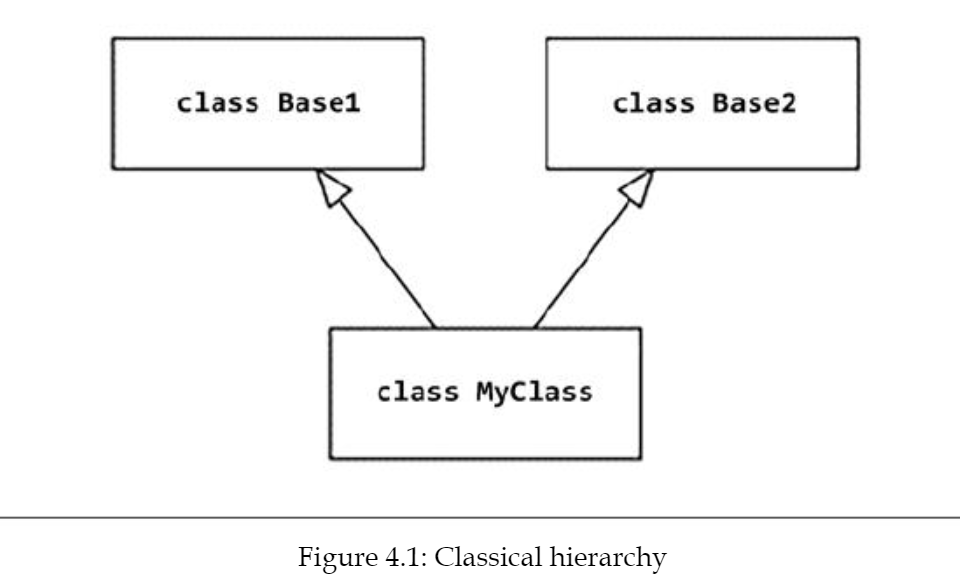


Lorsque nous introduisons une classe CommonBase au sommet de notre hiérarchie de classes (reportez-vous à la figure 4.2), les choses deviennent plus compliquées :

In [ ]:
class CommonBase:    
  pass


class Base1(CommonBase):     
  pass       

class Base2(CommonBase):    
  def method(self):        
    print("Base2.method() called")
  
class MyClass(Base1, Base2):     
  pass

Par conséquent, l'ordre de résolution simple qui se comporte selon la règle de profondeur de gauche à droite revient en premier à travers la classe Base1 avant d'examiner la classe Base2. Cet algorithme produit une sortie contre-intuitive. Sans la linéarisation C3, la méthode exécutée ne serait pas celle qui est la plus proche dans l'arbre d'héritage

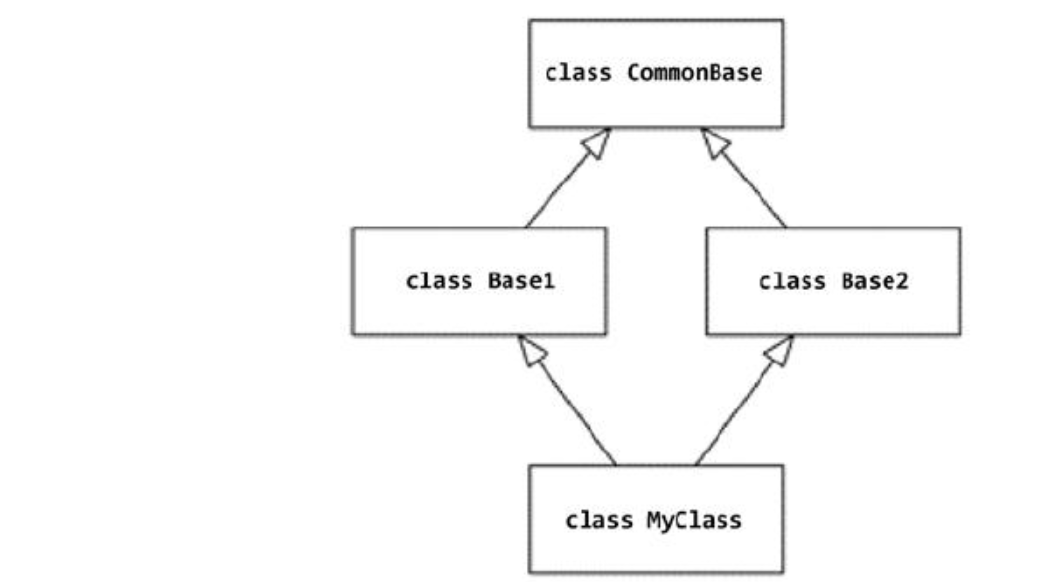

Un tel scénario d'héritage (connu sous le nom de hiérarchie de classe diamant) est plutôt rare pour les classes personnalisées. La bibliothèque standard ne structure généralement pas les hiérarchies d'héritage de cette manière, et de nombreux développeurs pensent que c'est une mauvaise pratique. C'est possible avec Python de toute façon et nécessite donc une stratégie de manipulation bien définie et claire.

De plus, à partir de Python 2.3, l'objet est au sommet de la hiérarchie des types pour les classes. Essentiellement, chaque classe fait partie d'une grande hiérarchie d'héritage de classe diamant. C'est devenu quelque chose qui doit également être résolu du côté C du langage. C'est pourquoi Python a maintenant la linéarisation C3 comme algorithme MRO.

## Initialisation d'instance de classe 

Un objet en POO est une entité qui encapsule des données avec un comportement. En Python, les données sont contenues sous forme d'attributs d'objet, qui sont simplement des variables d'objet. Le comportement, quant à lui, est représenté par des méthodes. C'est commun à presque tous les langages POO, mais la nomenclature exacte est parfois différente. Par exemple, en C++ et Java, les données d'objet sont dites stockées dans des champs. Dans Kotlin, les données d'objet sont stockées derrière des propriétés (bien qu'elles soient un peu plus que de simples variables d'objet).

Ce qui différencie Python des langages POO à typage statique est son approche de la déclaration et de l'initialisation des attributs d'objet. En bref, les classes Python ne nécessitent pas que vous définissiez des attributs dans le corps de la classe. Une variable existe au moment où elle est initialisée. C'est pourquoi la manière canonique de déclarer les attributs d'objet consiste à attribuer leurs valeurs lors de l'initialisation de l'objet dans la méthode __init__() :

In [ ]:
class Point:   
  def __init__(self, x, y):      
    self.x = x      
    self.y = y

Cela peut être déroutant pour ceux qui viennent à Python avec une connaissance préalable des langages de programmation à typage statique. Dans ces langages, la déclaration des champs d'objet est généralement statique et vit en dehors de la fonction d'initialisation de l'objet. C'est pourquoi les programmeurs ayant une formation en C++ ou Java ont souvent tendance à reproduire ce modèle en affectant des valeurs par défaut en tant qu'attributs de classe dans le corps de la classe principale :

In [ ]:
class Point:  
  x = 0
  y = 0 
  def __init__(self, x, y):      
    self.x = x      
    self.y = y

Le code ci-dessus est un exemple classique d'idiome de langue étrangère répliqué en Python. Surtout, il est redondant : les valeurs des attributs de classe seront toujours masquées par les attributs d'objet lors de l'initialisation. Mais c'est aussi une odeur de code dangereuse : cela peut conduire à des erreurs problématiques si l'on décide d'assigner comme attribut de classe un type mutable comme list ou dict

    Une odeur de code est une caractéristique du code qui peut être le signe
    d'un problème plus profond. Un morceau de code spécifique peut être
    fonctionnellement correct et exempt d'erreurs, mais peut être un tampon
    pour de futurs problèmes. Les odeurs de code sont généralement de petites
    lacunes architecturales ou des constructions dangereuses qui attirent les
    bogues

Le problème vient du fait que les attributs de classe (attributs affectés en dehors du corps de la méthode) sont affectés à des objets de type et non à des instances de type. Lors de l'accès à un attribut avec self.attribute, Python recherchera d'abord la valeur de l'attribut name dans l'espace de noms de l'instance de classe. Si cette recherche échoue, elle effectuera une recherche dans l'espace de noms du type de classe. Lors de l'attribution de valeurs via self.attribute depuis la méthode de classe, le comportement est complètement différent : de nouvelles valeurs sont toujours attribuées dans l'espace de noms de l'instance de classe. Ceci est particulièrement gênant avec les types mutables car cela peut provoquer une fuite accidentelle de l'état de l'objet entre les instances de classe

Étant donné que l'utilisation de types mutables comme attributs de classe au lieu d'attributs d'instance est plutôt une mauvaise pratique, il est difficile de trouver des exemples de code qui seraient pratiques. Mais cela ne signifie pas que nous ne pouvons pas examiner rapidement comment cela fonctionne réellement. Considérez la classe suivante, qui est censée agréger les valeurs sous forme de liste et suivre la dernière valeur agrégée :

In [8]:
class Aggregator:    
  all_aggregated = []    
  last_aggregated = None    

  def aggregate(self, value):        
    self.last_aggregated = value        
    self.all_aggregated.append(value)

Pour voir où se situe le problème, commençons une session interactive, créons deux agrégateurs distincts et commençons à agréger les éléments :

In [9]:
a1 = Aggregator()
a2 = Aggregator()

a1.aggregate("a1-1")
a1.aggregate("a1-2")
a2.aggregate("a2-1")

Si nous examinons maintenant les listes d'agrégation des deux instances, nous verrons une sortie très inquiétante :

In [10]:
a1.all_aggregated

['a1-1', 'a1-2', 'a2-1']

In [11]:
a2.all_aggregated

['a1-1', 'a1-2', 'a2-1']

Quelqu'un qui lit le code pourrait penser que toutes les instances Aggregator sont censées suivre l'historique de leurs propres agrégations. Mais nous voyons qu'à la place, toutes les instances d'agrégateur partagent l'état de l'attribut all_aggregated. D'autre part, lorsque l'on regarde les dernières valeurs agrégées, on voit des valeurs correctes pour les deux agrégateurs :

In [13]:
a1.last_aggregated

'a1-2'

In [14]:

a2.last_aggregated

'a2-1'

Dans de telles situations, il est facile de résoudre le mystère en inspectant les valeurs d'attribut de classe non liées :

In [15]:
Aggregator.all_aggregated

['a1-1', 'a1-2', 'a2-1']

In [16]:
Aggregator.last_aggregated

Comme nous le voyons dans la transcription ci-dessus, toutes les instances Aggregator ont partagé leur état via l'attribut modifiable Aggregator.all_aggregated. Quelque chose comme cela pourrait être le comportement prévu, mais très souvent, il ne s'agit que d'un exemple d'erreur parfois difficile à détecter. De ce fait, toutes les valeurs d'attribut censées être uniques pour chaque instance de classe doivent absolument être initialisées dans la méthode __init__() uniquement.

La version fixe de la classe Aggregator serait la suivante

In [ ]:
class Aggregator:    
  def __init__(self):        
    self.all_aggregated = []        
    self.last_aggregated = None   
  
  def aggregate(self, value):        
    self.last_aggregated = value        
    self.all_aggregated.append(value)

Nous avons simplement déplacé l'initialisation des attributs all_aggregated et last_aggregated vers la méthode __init__(). Répétons maintenant les mêmes appels d'initialisation et d'agrégation que dans la session précédente :

In [17]:
a1 = Aggregator()
a2 = Aggregator()

a1.aggregate("a1-1")
a1.aggregate("a1-2")
a2.aggregate("a2-1")

Si nous inspectons maintenant l'état des instances Aggregator, nous verrons qu'elles suivent indépendamment l'historique de leurs agrégations :

In [18]:
a1.all_aggregated

['a1-1', 'a1-2', 'a2-1', 'a1-1', 'a1-2', 'a2-1']

In [19]:
a2.all_aggregated

['a1-1', 'a1-2', 'a2-1', 'a1-1', 'a1-2', 'a2-1']

Si vous ressentez vraiment le besoin d'avoir une sorte de déclaration de tous les attributs en haut de la définition de classe, vous pouvez utiliser des annotations de type comme dans l'exemple suivant :

In [20]:
from typing import Any, List
class Aggregator:    
  all_aggregated: List[Any]    
  last_aggregated: Any
      
  def __init__(self):        
    self.all_aggregated = []        
    self.last_aggregated = None   
  
  def aggregate(self, value):        
    self.last_aggregated = value        
    self.all_aggregated.append(value)

Avoir des annotations d'attribut de classe n'est en fait pas une mauvaise pratique. Ils peuvent être utilisés par des vérificateurs de type statiques ou des IDE pour augmenter la qualité du code et mieux communiquer l'utilisation prévue de votre classe et les éventuelles contraintes de type. De telles annotations d'attribut de classe sont également utilisées pour simplifier l'initialisation des classes de données, dont nous parlerons dans la section Classes de données

## Modèles d'accès aux attributs 

Une autre chose qui distingue Python des autres langages orientés objet à typage statique est l'absence de la notion de membres de classe publics, privés et protégés. Dans d'autres langages, ceux-ci sont souvent utilisés pour restreindre ou ouvrir l'accès aux attributs d'objet pour le code en dehors de la classe. La fonctionnalité Python la plus proche de ce concept est la manipulation de noms. Chaque fois qu'un attribut est préfixé par __ (deux traits de soulignement) dans un corps de classe, il est renommé par l'interpréteur sur le fly :

In [ ]:
class MyClass:     
  def __init__(self):        
    self.__secret_value = 1

    Notez que le motif de double trait de soulignement est appelé "dunder".
    Reportez-vous à la section Méthodes Dunder (protocoles de langage) pour
    plus d'informations

Accéder à l'attribut __secret_value par son nom initial en dehors de la classe lèvera une exception AttributeError


On pourrait penser que cela est synonyme de champs et de méthodes privés/protégés que l'on trouve couramment dans d'autres langages POO. Cela rend en effet plus difficile l'accès à ces attributs en dehors de la classe mais ne rend pas un tel accès impossible. Les champs et méthodes privés et protégés dans de nombreux autres langages POO sont un moyen de fournir une encapsulation de classe. Ils sont utilisés pour restreindre l'accès à des symboles spécifiques à toute personne extérieure à une classe spécifique (privée) ou à toute personne extérieure à l'arbre d'héritage (protégé). 

En Python, la manipulation des noms ne restreint en aucune façon l'accès aux attributs. Cela ne fait que le rendre moins pratique. Le but de la manipulation de noms est un moyen implicite d'éviter les collisions de noms. Par exemple, il peut arriver qu'un identificateur spécifique soit un ajustement parfait pour un nouvel attribut interne dans une sous-classe. Si ce nom est déjà pris quelque part dans l'arbre d'héritage, le conflit de noms peut entraîner un comportement inattendu

Dans de telles situations, le programmeur peut décider d'utiliser un nom différent ou d'utiliser la manipulation de noms pour résoudre le conflit. 

La manipulation de noms peut également aider à éviter les conflits de noms dans les sous-classes. Néanmoins, il n'est pas recommandé d'utiliser la manipulation de noms dans les classes de base par défaut, juste pour éviter toute collision à l'avance. Tout se résume à la façon de faire de Python. 

Les langages typés statiquement avec des mots-clés privés/protégés appliquent la restriction d'accès aux attributs. Cela signifie qu'il n'y a généralement aucun moyen d'accéder à ces attributs privés/protégés en dehors de la classe. En Python, il est plus courant de communiquer clairement l'utilisation prévue de chaque attribut au lieu d'empêcher les utilisateurs de faire ce qu'ils veulent. Avec ou sans nom mutilé, les programmeurs trouveront quand même un moyen d'accéder à l'attribut. Alors, quel est l'intérêt de rendre cela moins pratique pour eux ? Lorsqu'un attribut n'est pas public, la convention à utiliser est un _préfixe. Cela n'implique a ucun algorithme de manipulation de noms, mais documente simplement l'attribut comme un élément interne de la classe qui n'est pas destiné à être utilisé en dehors du contexte de la classe.

 De nombreux IDE et vérificateurs de style sont déjà conscients de cette convention et sont capables de mettre en évidence les endroits où ces membres internes sont accessibles en dehors de leur classe. Python dispose également d'autres mécanismes pour séparer la partie publique de la classe de son code privé. Deux de ces mécanismes sont les descripteurs et les propriétés

## Descripteurs

Un descripteur vous permet de personnaliser ce qui doit être fait lorsque vous faites référence à un attribut d'un objet. Les descripteurs sont la base de l'accès aux attributs complexes en Python. Ils sont utilisés en interne pour implémenter des propriétés, des méthodes, des méthodes de classe, des méthodes statiques et super. Ce sont des objets qui définissent comment accéder aux attributs d'une autre classe. En d'autres termes, une classe peut déléguer la gestion d'un attribut à une autre classe. 

Les classes de descripteurs sont basées sur trois méthodes spéciales qui forment le protocole de descripteur :

*  \_\_set_\_ (self, obj, value) : il est appelé chaque fois que l'attribut est défini . Dans les exemples suivants, nous nous y référerons en tant que setter.

* \_\_get__(self, obj, owner=None) : Ceci est appelé chaque fois que l'attribut est lu (appelé getter).

* \_\_delete__(self, obj) : Ceci est appelé lorsque del est invoqué sur l'attribut.

descripteur qui implémente \_\_get__() et \_\_set__() est appelé un descripteur de données. S'il implémente simplement \_\_get_\_(), alors il est appelé un descripteur non-données. 

Les méthodes du protocole de descripteur sont, en fait, appelées par la méthode spéciale \_\_getattribute_\_() de l'objet à chaque recherche d'attribut (ne la confondez pas avec \_\_getattr__() , qui a un but différent). Chaque fois qu'une telle recherche est effectuée, soit en utilisant une notation pointée sous la forme instance.attribute, soit en utilisant l'appel de fonction getattr(instance, 'attribute'), la méthode \_\_getattribute__() est invoquée implicitement et elle recherche un attribut dans l'ordre suivant : 

* 1. Il vérifie si l'attribut est un descripteur de données sur l'objet de classe de l'instance
* 2. Si ce n'est pas le cas, il regarde si l'attribut peut être trouvé dans la recherche \_\_dict__ de l'instance object

* 3. Enfin, il regarde pour voir si l'attribut est un descripteur non-données sur l'objet de classe de l'instance

En d'autres termes, les descripteurs de données ont priorité sur la recherche \_\_dict__, et la recherche \_\_dict__ a priorité sur les descripteurs non-données. code réel :

In [21]:
class RevealAccess(object):     
  """A data descriptor that sets and returns values        
  normally and prints a message logging their access.     
  """      
  
  def __init__(self, initval=None, name='var'):         
    self.val = initval         
    self.name = name      
    
  def __get__(self, obj, objtype):         
    print('Retrieving', self.name)         
    return self.val      
  
  def __set__(self, obj, val):         
    print('Updating', self.name)         
    self.val = val      
  
  def __delete__(self, obj):         
    print('Deleting', self.name)

In [22]:
class MyClass(object):     
  x = RevealAccess(10, 'var "x"')     
  y = 5

Notez que x = RevealAccess() est défini comme un attribut de classe au lieu de l'assigner dans la méthode \_\_init__(). Les descripteurs, pour fonctionner, doivent être définis comme des attributs de classe. En outre, ils sont plus proches des méthodes que des attributs de variables normaux. Voici un exemple d'utilisation du descripteur RevealAccess dans la session interactive :

In [24]:
m = MyClass()
m.x

Retrieving var "x"


10

In [25]:
m.x = 20

Updating var "x"


In [26]:
m.x

Retrieving var "x"


20

In [27]:
m.y

5

In [28]:
del m.x

Deleting var "x"


L'exemple précédent montre clairement que, si une classe a le descripteur de données pour l'attribut donné, alors la méthode \_\_get__() du descripteur est appelée pour renvoyer la valeur chaque fois que l'attribut d'instance est récupéré, et \_\_set__() est appelée chaque fois qu'une valeur est récupérée. attribué à un tel attribut. 

La méthode \_\_del__ d'un descripteur est appelée chaque fois qu'un attribut d'instance est supprimé avec l'instruction del instance.attribute ou l'appel delattr(instance, 'attribute'). début de la rubrique. 

Python utilise déjà le protocole de descripteur pour lier des fonctions de classe à des instances en tant que méthodes.

Les descripteurs alimentent également le mécanisme derrière les décorateurs classmethod et staticmethod. C'est parce que, en fait, les objets de fonction sont aussi des descripteurs non-données :

In [29]:
def function():
   pass
   
print(hasattr(function, '__get__'))
print(hasattr(function, '__set__'))

True
False


Ceci est également vrai pour les fonctions créées avec des expressions lambda :

In [30]:
print(hasattr(lambda: None, '__get__'))

print(hasattr(lambda: None, '__set__'))

True
False


Ainsi, sans que \_\_dict__ ne prenne le pas sur les descripteurs non-données, nous ne serions pas en mesure de remplacer dynamiquement des méthodes spécifiques sur des instances déjà construites au moment de l'exécution. Heureusement, grâce au fonctionnement des descripteurs en Python, c'est possible ; ainsi, les développeurs peuvent utiliser une technique populaire appelée patching de singe pour changer la façon dont les instances fonctionnent ad hoc sans avoir besoin de sous-classer.

## Exemple réel - attributs évalués paresseusement

Un exemple d'utilisation des descripteurs peut consister à retarder l'initialisation de l'attribut de classe au moment où il est accessible à partir de l'instance. Cela peut être utile si l'initialisation de tels attributs dépend d'un contexte qui n'est pas encore disponible au moment où la classe est importée. L'autre cas est l'économie de ressources alors qu'une telle initialisation est simplement coûteuse en termes de ressources de calcul mais on ne sait pas si l'attribut sera quand même utilisé au moment de l'importation de la classe. Un tel descripteur pourrait être implémenté comme suit :

In [31]:
class InitOnAccess:     
  def __init__(self, init_func, *args, **kwargs):         
    self.klass = init_func         
    self.args = args         
    self.kwargs = kwargs         
    self._initialized = None

  def __get__(self, instance, owner):         
    if self._initialized is None:             
      print('initialized!')             
      self._initialized = self.klass(*self.args,               
                                     **self.kwargs)         
    else:             
      print('cached!')         
    return self._initialized

La classe de descripteur InitOnAccess inclut des appels print() qui nous permettent de voir si les valeurs ont été initialisées à l'accès ou accédées depuis le cache. Imaginons que nous voulons avoir une classe où toutes les instances ont accès à une liste partagée de valeurs aléatoires triées. 

La longueur de la liste peut être arbitrairement longue, il est donc logique de la réutiliser pour toutes les instances. D'un autre côté, trier des entrées très longues peut prendre du temps. C'est pourquoi la classe InitOnAccess s'assurera qu'une telle liste ne sera initialisée qu'au premier accès. Notre définition de classe pourrait être la suivante :

In [32]:
import random

class WithSortedRandoms:    
  lazily_initialized = InitOnAccess(        
      sorted,        
      [random.random() for _ in range(5)])

Notez que nous avons utilisé une entrée assez petite dans la fonction range() pour rendre la sortie lisible. Voici un exemple d'utilisation de la classe WithSortedRandoms dans une session interactive :

In [33]:
m = WithSortedRandoms()
m.lazily_initialized

initialized!


[0.010184295229492046,
 0.4178345411529196,
 0.6915538042627275,
 0.777055808673999,
 0.8220087496546435]

In [34]:
m.lazily_initialized

cached!


[0.010184295229492046,
 0.4178345411529196,
 0.6915538042627275,
 0.777055808673999,
 0.8220087496546435]

La bibliothèque officielle OpenGL Python disponible sur PyPI sous le nom PyOpenGL utilise une technique similaire pour implémenter un objet lazy_property qui est à la fois un décorateur et un descripteur de données :

In [36]:
class lazy_property(object):     
  def __init__(self, function):         
    self.fget = function      
    
  def __get__(self, obj, cls):         
    value = self.fget(obj)         
    setattr(obj, self.fget.__name__, value)         
    return value

La fonction setattr() vous permet de définir l'attribut de l'instance d'objet en utilisant l'attribut de l'argument positionnel fourni. Ici, c'est self.fget.\_\_name__. Il est construit comme ça car le descripteur lazy_property est censé être utilisé comme décorateur de la méthode agissant comme fournisseur de la valeur initialisée comme dans l'exemple suivant :

In [37]:
class WithSortedRandoms:    
  @lazy_property    
  def lazily_initialized(self):        
    return sorted([[random.random() for _ in range(5)]])

Une telle implémentation est similaire à l'utilisation du décorateur de propriété décrit dans la section suivante. La fonction qui l'accompagne n'est exécutée qu'une seule fois, puis l'attribut d'instance est remplacé par une valeur renvoyée par cette propriété de fonction. Cet attribut d'instance a priorité sur le descripteur (l'attribut de classe) donc plus aucune initialisation ne sera effectuée sur l'instance de classe donnée. Cette technique est souvent utile lorsqu'

* Une instance d'objet doit être stockée en tant qu'attribut de classe partagé entre ses instances (pour économiser les ressources)

* Cet objet ne peut pas être initialisé au moment de l'importation car son processus de création dépend d'un état/contexte global de l'application

Dans le cas d'applications écrites en OpenGL, vous pouvez très souvent rencontrer ce genre de situation. Par exemple, la création de shaders en OpenGL est coûteuse car elle nécessite une compilation de code écrit en OpenGL Shading Language (GLSL). Il est raisonnable de ne les créer qu'une seule fois, et, en même temps, d'inclure leur définition à proximité des classes qui en ont besoin. D'un autre côté, les compilations de shaders ne peuvent pas être effectuées sans initialisation du contexte OpenGL, il est donc difficile de les définir et de les compiler de manière fiable dans un espace de noms de module global au moment de l'importation. 

L'exemple suivant montre l'utilisation possible du modified version du décorateur lazy_property de PyOpenGL (ici, lazy_class_attribute) dans une application imaginaire basée sur OpenGL. La modification en surbrillance du décorateur original lazy_property était nécessaire pour permettre le partage de l'attribut entre différentes instances de classe :

In [ ]:
import OpenGL.GL as gl 
from OpenGL.GL import shaders   


class lazy_class_attribute(object):     
  def __init__(self, function):         
    self.fget = function      
  
  def __get__(self, obj, cls):        
    value = self.fget(cls)        
    # note: storing in class object not its instance        
    #       no matter if its a class-level or        
    #       instance-level access        
    
    setattr(cls, self.fget.__name__, value)        
    return value   
    

class ObjectUsingShaderProgram(object):     
  # trivial pass-through vertex shader implementation   

  VERTEX_CODE = """         
  #version 330 core         
  layout(location = 0) in vec4 vertexPosition;         
  void main(){
    gl_Position =  vertexPosition;         
    }     
    """     
    # trivial fragment shader that results in everything     
    # drawn with white color     
  FRAGMENT_CODE = """         
  #version 330 core         
  out lowp vec4 out_color;         
  void main(){             
      out_color = vec4(1, 1, 1, 1);         
      }     
      """      
  @lazy_class_attribute     
  def shader_program(self):         
    print("compiling!")         
    return shaders.compileProgram(             
        shaders.compileShader(                 
            self.VERTEX_CODE, gl.GL_VERTEX_SHADER             
            ),             
            shaders.compileShader(                 
                self.FRAGMENT_CODE, gl.GL_FRAGMENT_SHADER             
                )         
            )

Comme toutes les fonctionnalités avancées de la syntaxe Python, celle-ci doit également être utilisée avec prudence et bien documentée dans le code. Les descripteurs affectent la partie la plus basique du comportement des classes. Pour les développeurs inexpérimentés, le comportement modifié de la classe peut être très déroutant et inattendu. Pour cette raison, il est très important de s'assurer que tous les membres de votre équipe connaissent les descripteurs et comprennent bien ce concept s'il joue un rôle important dans la base de code de votre projet.

## Propriétés

Quiconque a programmé en C++ ou Java pendant un certain temps devrait probablement être familier avec le terme encapsulation. C'est un moyen de protéger l'accès direct aux champs de classe provenant de l'hypothèse que toutes les données internes détenues par une classe doivent être considérées comme privées. Dans une classe entièrement encapsulée, le moins de méthodes possible doivent être exposées en public. Tout accès en écriture ou en lecture à l'état d'un objet doit être exposé via des méthodes setter et getter capables de protéger une utilisation correcte. En Java, par exemple, ce modèle peut ressembler à ceci :

In [ ]:
public class UserAccount {  
    private String username;  
    public String getUsername() {    
        return username;  
        }  
public void setUsername(String newUsername) {    
    this.username = newUsername;  
    }}

La méthode getUsername() est un getter de nom d'utilisateur et la méthode setUsername() est un setter de nom d'utilisateur. La prémisse est assez bonne. 

En masquant l'accès aux membres de la classe derrière les getters et les setters (également appelés accesseurs et mutateurs), vous pouvez protéger le bon accès aux valeurs de classe internes (disons, effectuer une validation sur les setters). 

Vous créez également un point d'extension dans l'API publique de classe qui peut être potentiellement enrichi avec un comportement supplémentaire chaque fois qu'il y a un tel besoin sans rompre la compatibilité descendante de l'API de classe. Imaginons que vous ayez une classe pour un compte utilisateur qui, entre autres, stocke le mot de passe de l'utilisateur. Si vous souhaitez émettre des journaux d'audit chaque fois qu'un mot de passe est accédé, vous pouvez soit vous assurer que chaque endroit de votre code qui accède aux mots de passe utilisateur ait des appels de journal d'audit appropriés, soit proxy tous les accès à l'entrée de mot de passe via un ensemble de méthodes setter et getter qui avoir l'appel de journalisation ajouté par défaut. 

Le problème est que vous ne pouvez jamais être sûr de ce qui nécessitera une extension supplémentaire à l'avenir. Ce simple fait conduit souvent à une sur-encapsulation et à une litanie sans fin de méthodes setter et getter pour chaque champ possible qui pourrait autrement être public. 

Ils sont tout simplement fastidieux à écrire et n'offrent trop souvent que peu ou pas d'avantages et ne font que réduire le rapport signal sur bruit. Heureusement, Python a une approche complètement différente du modèle d'accès et de mutation via le mécanisme des propriétés. Les propriétés vous permettent d'exposer librement les membres publics des classes et de les convertir simplement en méthodes getter et setter chaque fois que vous en avez besoin. Et vous pouvez le faire complètement sans casser la rétrocompatibilité de votre API de classe. Prenons l'exemple d'une classe UserAccount encapsulée qui n'utilise pas la fonctionnalité des propriétés :

In [38]:
class UserAccount:    
  def __init__(self, username, password):        
    self._username = username        
    self._password = password

  def get_username(self):        
    return self._username    
  
  def set_username(self, username):        
    self._username = username    
  
  def get_password(self):        
    return self._password    
    
  def set_username(self, password):        
    self._password = password

Chaque fois que vous voyez un code comme celui-ci, qui peut être reconnu par l'abondance des méthodes get_ et set_, vous pouvez être presque sûr à 100 % que vous avez affaire à un idiome de langue étrangère. C'est quelque chose qu'un programmeur C++ ou Java pourrait écrire. Un programmeur Python chevronné écrirait plutôt ce qui suit :

In [ ]:
class UserAccount:    
  def __init__(self, username, password):        
    self.username = username        
    self.password = password

Et seulement lorsqu'il y a un réel besoin de cacher un champ spécifique derrière une propriété, pas plus tôt, un programmeur expérimenté apportera la modification suivante :

In [ ]:
class UserAccount:    
  def __init__(self, username, password):        
    self.username = username        
    self._password = password        
  
  @property    
  def password(self):        
    return self._password    
  
  @password.setter    
  def password(self, value):        
    self._password = value

Les propriétés fournissent un type de descripteur intégré qui sait comment lier un attribut à un ensemble de méthodes. La fonction property() prend quatre arguments optionnels : fget, fset, fdel et doc. Le dernier peut être fourni pour définir une fonction docstring qui est liée à l'attribut comme s'il s'agissait d'une méthode. Voici un exemple de classe Rectangle qui peut être contrôlée soit par un accès direct aux attributs qui stockent deux points d'angle, soit en utilisant les propriétés width et height :

In [39]:
class Rectangle:     
  def __init__(self, x1, y1, x2, y2):         
    self.x1, self.y1 = x1, y1         
    self.x2, self.y2 = x2, y2      
  
  def _width_get(self):         
    return self.x2 - self.x1      
  
  def _width_set(self, value):         
    self.x2 = self.x1 + value      
  
  def _height_get(self):         
    return self.y2 - self.y1      
  
  def _height_set(self, value):         
    self.y2 = self.y1 + value      
    
  width = property(         
      _width_get, _width_set,         
      doc="rectangle width measured from left"     
      )     
  
  height = property(         
      _height_get, _height_set,         
      doc="rectangle height measured from top"    
      )      
  
  def __repr__(self):         
    return "{}({}, {}, {}, {})".format(             
        self.__class__.__name__,             
        self.x1, self.y1, self.x2, self.y2         
        )

Voici un exemple de telles propriétés définies dans une session interactive :

In [40]:
rectangle = Rectangle(10, 10, 25, 34)
rectangle.width, rectangle.height

(15, 24)

In [41]:
rectangle.width = 100
rectangle

Rectangle(10, 10, 110, 34)

In [42]:
rectangle.height = 100
rectangle

Rectangle(10, 10, 110, 110)

In [43]:
help(Rectangle)

Help on class Rectangle in module __main__:

class Rectangle(builtins.object)
 |  Rectangle(x1, y1, x2, y2)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x1, y1, x2, y2)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  height
 |      rectangle height measured from top
 |  
 |  width
 |      rectangle width measured from left



Les propriétés facilitent l'écriture des descripteurs mais doivent être manipulées avec précaution lors de l'utilisation de l'héritage sur les classes. 

L'attribut créé est créé sur le fly en utilisant les méthodes de la classe actuelle et n'utilisera pas les méthodes qui sont surchargées dans les classes dérivées. 

Par exemple, l'exemple suivant ne parviendra pas à remplacer l'implémentation de la méthode fget de la largeur de la classe parent biens:

In [44]:
class MetricRectangle(Rectangle):
  def _width_get(self):
    return "{} meters".format(self.x2 - self.x1)

Rectangle(0, 0, 100, 100).width

100

Pour résoudre ce problème, la propriété entière doit simplement être écrasée dans la classe dérivée :

In [45]:
class MetricRectangle(Rectangle):
  def _width_get(self):
    return "{} meters".format(self.x2 - self.x1)

  width = property(_width_get, Rectangle.width.fset)
  
MetricRectangle(0, 0, 100, 100).width

'100 meters'

Malheureusement, le code précédent a quelques problèmes de maintenabilité. Cela peut être une source de confusion si le développeur décide de changer la classe parent mais oublie de mettre à jour l'appel de propriété. C'est pourquoi il n'est pas conseillé de remplacer uniquement certaines parties du comportement de la propriété. Au lieu de s'appuyer sur l'implémentation de la classe parente, il est recommandé de réécrire toutes les méthodes de propriété dans les classes dérivées si vous devez modifier leur fonctionnement. 

Dans la plupart des cas, il s'agit de la seule option, car généralement, la modification du comportement du setter de propriété implique également une modification du comportement de getter. Pour cette raison, la meilleure syntaxe pour créer des propriétés consiste à utiliser la propriété comme décorateur. Cela réduira le nombre de signatures de méthode à l'intérieur de la classe et rendra le code plus lisible et maintenable :

In [46]:
class Rectangle:    
  def __init__(self, x1, y1, x2, y2):        
    self.x1, self.y1 = x1, y1        
    self.x2, self.y2 = x2, y2    
    
  @property    
  def width(self):        
    """rectangle width measured from left"""        
    return self.x2 - self.x1    
    
  @width.setter    
  def width(self, value):
    self.x2 = self.x1 + value    
    
  @property    
  def height(self):        
    """rectangle height measured from top"""        
    return self.y2 - self.y1    
    
  @height.setter    
  def height(self, value):        
    self.y2 = self.y1 + value

La meilleure chose à propos du mécanisme de propriétés Python est qu'il peut être introduit progressivement dans une classe. Vous pouvez commencer par exposer les attributs publics de l'instance de classe et les convertir en propriétés uniquement en cas de besoin. 

Les autres parties de votre code ne remarqueront aucun changement dans l'API de classe car les propriétés sont accessibles comme s'il s'agissait d'attributs d'instance ordinaires. Nous avons jusqu'à présent discuté du modèle de données orienté objet de Python par rapport à différents langages de programmation. Mais le modèle de données n'est qu'une partie du paysage POO. 

L'autre facteur important de chaque langage orienté objet est l'approche du polymorphisme. Python fournit quelques implémentations du polymorphisme et ce sera le sujet de la section suivante.

## Polymorphisme dynamique

Le polymorphisme est un mécanisme couramment utilisé dans les langages POO. Le polymorphisme fait abstraction de l'interface d'un objet de son type. Différents langages de programmation réalisent le polymorphisme par différents moyens. 

Pour les langages à typage statique, cela se fait généralement par : 

* Sous-typage : les sous-types de type A peuvent être utilisés dans chaque interface qui attend le type A. Les interfaces sont définies explicitement et les sous-types/sous-classes héritent des interfaces de leurs parents. Il s'agit d'un mécanisme de polymorphisme trouvé en C++.

* Interfaces implicites : chaque type peut être utilisé dans l'interface qui attend une interface de type A tant qu'il implémente les mêmes méthodes (a la même interface) que le type A. Les déclarations d'interfaces sont toujours définis explicitement mais les sous-classes/sous-types n'ont pas à hériter explicitement des classes/types de base qui définissent une telle interface. Il s'agit d'un mécanisme de polymorphisme trouvé dans Go

Python est un langage à typage dynamique, il utilise donc un mécanisme de polymorphisme plutôt laxiste souvent appelé typage canard. Le principe de frappe du canard dit ce qui suit :

    S'il marche comme un canard et cancane comme un canard, alors ce doit être un canard.

L'application de ce principe en Python signifie que n'importe quel objet peut être utilisé dans un contexte donné tant que l'objet fonctionne et se comporte comme le contexte l'attend. Cette philosophie de typage est très proche des interfaces implicites connues en Go, bien qu'elle ne nécessite aucune déclaration des interfaces attendues des arguments de la fonction. Étant donné que Python n'impose pas de types ou d'interfaces d'arguments de fonction, peu importe les types d'objets fournis à la fonction. Ce qui importe à la place, c'est quelles méthodes de ces objets sont réellement utilisées dans le corps de la fonction. Pour mieux comprendre le concept, considérons l'exemple suivant d'une fonction censée lire un fichier, imprimer son contenu et fermer le fichier par la suite :

In [ ]:
def printfile(file):    
  try:        
    contents = file.read()        
    print(file)    
  finally:        
    file.close()

D'après la signature de la fonction printfile(), on peut déjà deviner qu'elle attend un fichier ou un objet semblable à un fichier (comme StringIO du module io). Mais la vérité est que cette fonction consommera n'importe quel objet sans déclencher une exception inattendue si nous sommes en mesure de garantir pour l'argument d'entrée que :

* L'argument file a une méthode read()
* Le résultat de file.read() est un argument valide à la fonction print()
* L'argument file a la méthode close()

Les trois points ci-dessus indiquent également les trois endroits où le polymorphisme se produit dans l'exemple ci-dessus. Selon le type réel de l'argument file, la fonction printfile() utilisera différentes implémentations des méthodes read() et close(). Le type de la variable de contenu peut également être différent selon l'implémentation de file.read(), auquel cas la fonction print() utilisera une implémentation différente de la représentation de chaîne d'objet.

Cette approche du polymorphisme et du typage est vraiment puissante et flexible, bien qu'elle ait quelques inconvénients. En raison du manque d'application du type et de l'interface, il est plus difficile de vérifier l'exactitude du code avant l'exécution. C'est pourquoi les applications de haute qualité doivent s'appuyer sur des tests de code approfondis avec une couverture rigoureuse de chaque chemin que l'exécution du code peut emprunter. 

Python vous permet de surmonter partiellement ce problème grâce à des annotations d'indication de type qui peuvent être vérifiées avec des outils supplémentaires avant l'exécution. Le système de type dynamique de Python, associé au principe de typage de canard, crée une forme implicite et omniprésente de polymorphisme dynamique qui rend Python très similaire à JavaScript, qui manque également d'application de type statique. 

Mais il existe d'autres formes de polymorphisme disponibles pour les développeurs Python qui sont de nature plus "classique" et explicite. L'une de ces formes est la surcharge d'opérateur.

## Surcharge d'opérateurs

La surcharge d'opérateurs est un type spécifique de polymorphisme qui permet au langage d'avoir différentes implémentations d'opérateurs spécifiques selon les types d'opérandes. Les opérateurs de nombreux langages de programmation sont déjà polymorphes. Considérez les expressions suivantes qui seraient des constructions valides en Python :

In [ ]:
7 * 6
3.14 * 2
["a", "b"] * 3
"abba" * 2

Ces expressions en Python auraient quatre implémentations différentes :
* 7 * 6 est une multiplication entière résultant en une valeur entière de 42
* 3,14 * 2 est une multiplication flottante résultant en une valeur flottante de 6,28

* ["a", "b"] * 3 est une multiplication de liste résultant en une valeur de liste de ['a', 'b', 'a', 'b', 'a', 'b']
* "abba" * 2 est une multiplication de chaîne résultant en une valeur de chaîne de 'abbaabba'

La sémantique et l'implémentation de tous les opérateurs Python sont déjà différentes selon les types d'opérandes. Python fournit plusieurs types intégrés ainsi que diverses implémentations de leurs opérateurs, mais cela ne signifie pas que chaque opérateur peut être utilisé avec n'importe quel type.

Par exemple, l'opérateur + est utilisé pour la sommation ou la concaténation d'opérandes. Il est logique de concaténer des types numériques comme des nombres entiers ou à virgule flottante, ainsi que de concaténer des chaînes et des listes. 

Mais cet opérateur ne peut pas être utilisé avec des ensembles ou des dictionnaires car une telle opération n'aurait pas de sens mathématique (les ensembles pourraient être intersectés ou joints) et le résultat attendu serait ambigu (quelles valeurs de deux dictionnaires devraient être utilisées en cas de La surcharge d'opérateurs n'est que l'extension du polymorphisme intégré des opérateurs déjà inclus dans le langage de programmation. 

De nombreux langages de programmation, y compris Python, vous permettent de définir une nouvelle implémentation pour les types d'opérandes qui n'ont pas d'implémentation d'opérateur valide ou de masquer une implémentation existante via le sous-classement.

## Méthodes Dunder (protocoles de langage) 

Le modèle de données Python spécifie de nombreuses méthodes spécialement nommées qui peuvent être remplacées dans vos classes personnalisées pour leur fournir des capacités de syntaxe supplémentaires. Vous pouvez reconnaître ces méthodes par leurs conventions de nommage spécifiques qui enveloppent le nom de la méthode de doubles traits de soulignement. 

Pour cette raison, elles sont parfois appelées méthodes dunder. C'est simplement un raccourci pour les doubles traits de soulignement. L'exemple le plus courant et le plus évident de telles méthodes dunder est \_\_init__(), qui est utilisé pour l'initialisation d'instance de classe :



In [ ]:
class CustomUserClass:    
  def __init__(self, initiatization_argument):         
    ...

Ces méthodes, seules ou définies dans une combinaison spécifique, constituent les protocoles dits de langage. Si nous disons qu'un objet implémente un protocole de langage spécifique, cela signifie qu'il est compatible avec une partie spécifique de la syntaxe du langage Python. Voici un tableau des protocoles les plus courants dans le langage Python.

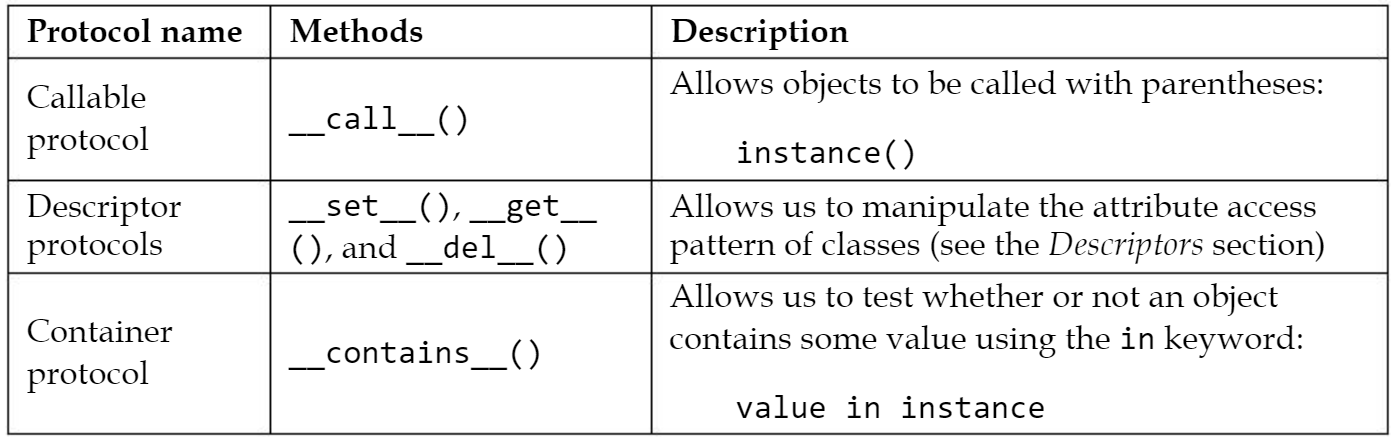

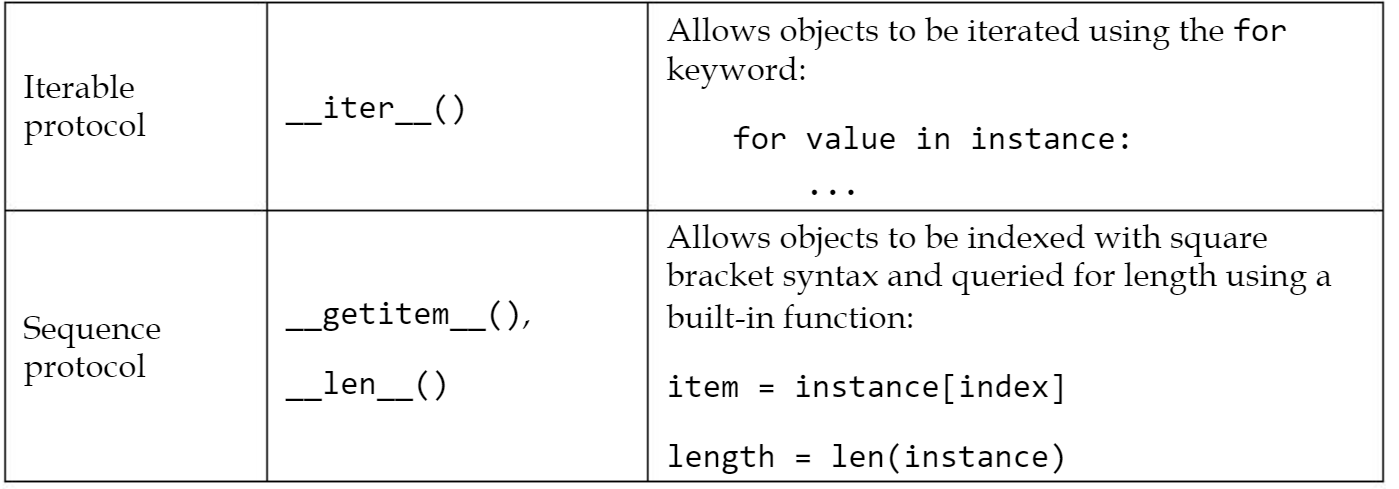

Chaque opérateur disponible en Python a son propre protocole et la surcharge de l'opérateur se produit en implémentant les méthodes dunder de ce protocole. Python fournit plus de 50 opérateurs surchargeables qui peuvent être divisés en cinq groupes principaux :

* Opérateurs arithmétiques 
* Opérateurs d'affectation sur place
* Opérateurs de comparaison
* Opérateurs d'identité
* Opérateurs au niveau du bit

Cela fait beaucoup de protocoles, nous ne les aborderons donc pas tous ici. Nous allons plutôt nous intéresser à un exemple pratique qui vous permettra de mieux comprendre comment implémenter la surcharge d'opérateurs par vous-même.

Supposons que nous ayons affaire à un problème mathématique qui peut être résolu par des équations matricielles. Une matrice est un élément mathématique d'algèbre linéaire avec des opérations bien définies. Dans sa forme la plus simple, il s'agit d'un tableau de nombres à deux dimensions. Python n'a pas de support natif pour les tableaux multidimensionnels autres que les listes imbriquées dans les listes. Pour cette raison, ce serait une bonne idée de fournir une classe personnalisée qui encapsule les matrices et les opérations entre elles. Commençons par initialiser notre classe

In [ ]:
class Matrix:    
  def __init__(self, rows):        
    if len(set(len(row) for row in rows)) > 1:            
      raise ValueError("All matrix rows must be the same length")        
    self.rows = rows

La première méthode dunder de la classe Matrix est \_\_init__(), qui nous permet d'initialiser la matrice en toute sécurité. Il accepte une liste variable de lignes de matrice comme arguments d'entrée via le déballage des arguments. Comme chaque ligne doit avoir le même nombre de colonnes, nous les parcourons et vérifions qu'elles ont toutes la même longueur. Ajoutons maintenant le premier opérateur de surcharge :

In [ ]:
def __add__(self, other):    
  if (        
      len(self.rows) != len(other.rows) or        
      len(self.rows[0]) != len(other.rows[0])    
      ):        
      raise ValueError("Matrix dimensions don't match")    
    return Matrix([        
                     [a + b for a, b in zip(a_row, b_row)]        
                     for a_row, b_row in zip(self.rows, other.rows)    
                     ])

La méthode \_\_add__() est responsable de la surcharge de l'opérateur + (signe plus) et nous permet ici d'additionner deux matrices ensemble. Seules des matrices de mêmes dimensions peuvent être additionnées. Il s'agit d'une opération assez simple qui consiste à ajouter tous les éléments de la matrice un par un pour former une nouvelle matrice. La méthode \_\_sub__() est responsable de la surcharge de l'opérateur – (signe moins) qui sera responsable de la soustraction de la matrice. Pour soustraire deux matrices, nous utilisons une technique similaire à celle de l'opérateur - :

In [ ]:
def __sub__(self, other):    
  if (       
       len(self.rows) != len(other.rows) or        
      len(self.rows[0]) != len(other.rows[0])    
      ):        
      raise ValueError("Matrix dimensions don't match")    
    
    return Matrix([    
                   [a - b for a, b in zip(a_row, b_row)]
                   for a_row, b_row in zip(self.rows, other.rows)    
                   ])

Et voici la dernière méthode que nous ajoutons à notre classe :

In [ ]:
def __mul__(self, other):    
  if not isinstance(other, Matrix):       
     raise TypeError(            
         f"Don't know how to multiply {type(other)} with Matrix"        
         )    
     
  if len(self.rows[0]) != len(other.rows):       
     raise ValueError(            
         "Matrix dimensions don't match"        
         )    
     
  rows = [[0 for _ in other.rows[0]] for _ in self.rows]    
  for i in range(len(self.rows)):        
    for j in range(len(other.rows[0])):            
      for k in range(len(other.rows)):                
        rows[i][j] += self.rows[i][k] * other.rows[k][j]    
        
  return Matrix(rows)

Le dernier opérateur surchargé est le plus complexe. Il s'agit de l'opérateur *, qui est implémenté via la méthode \_\_mul__(). 

En algèbre linéaire, les matrices n'ont pas la même opération de multiplication que les nombres réels. Deux matrices peuvent être multipliées si la première matrice a un nombre de colonnes égal au nombre de lignes de la deuxième matrice. 

Le résultat de cette opération est une nouvelle matrice où chaque élément est un produit scalaire de la ligne correspondante de la première matrice et de la colonne correspondante de la seconde matrice. Ici, nous avons construit notre propre implémentation de la matrice pour présenter l'idée de surcharge des opérateurs. Bien que Python n'ait pas de type intégré pour les matrices, vous n'avez pas besoin de les construire à partir de zéro. Le package NumPy est l'un des meilleurs packages mathématiques Python et fournit, entre autres, un support natif pour l'algèbre matricielle. Vous pouvez facilement obtenir le package NumPy auprès de PyPI.

## La comparaison avec C++ 

Un langage de programmation où la surcharge d'opérateurs est particulièrement courante est C++. C'est un langage OOP à typage statique qui n'a rien à voir avec Python. Python a des éléments OOP et certains mécanismes qui, par essence, sont similaires à ceux de C++. Il s'agit principalement de l'existence de classes et de l'héritage de classes ainsi que de la possibilité de surcharger les opérateurs. Mais la façon dont ces mécanismes sont implémentés dans le langage est complètement différente. Et c'est pourquoi la comparaison de ces deux langages est si fascinante. 

Le C++, contrairement à Python, possède plusieurs mécanismes de polymorphisme coexistants. Le mécanisme principal est le sous-typage, qui est également disponible en Python. Le deuxième type majeur de polymorphisme en C++ est le polymorphisme ad hoc par surcharge de fonctions. Python n'a pas d'équivalent direct de cette fonctionnalité. La surcharge de fonctions en C++ vous permet d'avoir plusieurs implémentations de la même fonction en fonction des arguments d'entrée. Cela signifie que vous pouvez avoir deux fonctions ou méthodes partageant le même nom mais ayant un nombre et/ou des types d'arguments différents. Comme C++ est un langage typé statiquement, les types d'arguments sont toujours connus à l'avance et le choix de l'implémentation exacte se fait au moment de la compilation. Pour le rendre encore plus flexible, la surcharge de fonction peut être utilisée avec la surcharge d'opérateur. 

Le cas d'utilisation d'une telle coexistence de surcharge peut être mieux compris si nous ramenons le cas d'utilisation de la multiplication matricielle. Nous savons que deux matrices peuvent être multipliées ensemble et nous avons appris à le faire dans la section précédente. Mais l'algèbre linéaire permet aussi de multiplier une matrice avec un type scalaire comme un nombre réel. 

Cette opération donne une nouvelle matrice où chaque élément a été multiplié par le scalaire. Dans le code, cela signifierait essentiellement une autre implémentation de l'opérateur de multiplication. En C++, vous pouvez simplement fournir plusieurs fonctions de surcharge d'opérateur * coexistantes. 

Voici un exemple de signatures de fonction C++ pour les opérateurs surchargés qui pourraient permettre diverses implémentations de multiplication matricielle et scalaire :


    Matrix operator+(const Matrix& lhs, const Matrix& rhs)
    Matrix operator+(const Matrix& lhs, const int& rhs)
    Matrix operator+(const Matrix& lhs, const float& rhs)
    Matrix operator+(const int& lhs, const Matrix& rhs)
    Matrix operator+(const float& lhs, const Matrix& rhs)

Python est un langage à typage dynamique, et c'est la principale raison pour laquelle il n'a pas de surcharge de fonctions comme en C++. Si nous voulons implémenter la surcharge de l'opérateur * sur la classe Matrix qui prend en charge à la fois la multiplication matricielle et la multiplication scalaire, nous devons vérifier le type d'entrée de l'opérateur au moment de l'exécution. Cela peut être fait avec la fonction intégrée isinstance() comme dans l'exemple suivant :

In [ ]:
def __mul__(self, other):    
  if isinstance(other, Matrix):        
    ...    
  elif isinstance(other, Number):        
    return Matrix([            
                   [item * other for item in row]            
                   for row in self.rows        
                   ])    
  else:        
    raise TypeError(f"Can't subtract {type(other)} from Matrix")

Une autre différence majeure est que la surcharge de l'opérateur C++ est effectuée via des fonctions libres au lieu de méthodes de classe, tandis qu'en Python, l'opérateur est toujours résolu à partir de la méthode dunder d'un opérande. Cette différence peut à nouveau être affichée à l'aide d'un exemple d'implémentation scalaire. L'exemple précédent nous permettait de multiplier une matrice par un nombre entier sous la forme suivante :

    Matrix([[1, 1], [2, 2]]) * 3

Cela fonctionnera car l'implémentation de l'opérateur surchargé sera résolue à partir de l'opérande de gauche. D'autre part, l'expression suivante entraînera TypeError :

    3 * Matrix([1, 1], [2, 2]])

En C++, vous pouvez fournir plusieurs versions de surcharge d'opérateur qui couvrent toutes les combinaisons de types d'opérandes pour l'opérateur *. En Python, la solution de contournement à ce problème consiste à fournir la méthode \_\_rmul__(). Cette méthode est résolue à partir de l'opérande de droite si l'opérateur \_\_mul__() de gauche lève TypeError. La plupart des opérateurs inx ont leurs alternatives d'implémentation du côté droit. Voici un exemple de la méthode \_\_rmul__() pour la classe Matrix qui vous permet d'effectuer une multiplication scalaire avec un argument numérique à droite :

In [ ]:
def __rmul__(self, other):        
  if isinstance(other, Number):            
    return self * other

Comme vous le voyez, cela nécessite toujours l'utilisation de l'évaluation de type via la fonction isinstance(), donc la surcharge d'opérateur doit être utilisée avec beaucoup de prudence, surtout si les opérateurs surchargés reçoivent une signification complètement nouvelle qui n'est pas conforme à leur objectif initial. les implémentations alternatives surchargées de l'opérateur en fonction du type d'opérande unique sont généralement un signe que l'opérateur a perdu sa signification claire. 

Par exemple, la multiplication matricielle et la multiplication scalaire sont mathématiquement deux opérations distinctes. Ils ont des propriétés différentes. Par exemple, la multiplication scalaire est cumulative alors que la multiplication matricielle ne l'est pas. Fournir un opérateur surchargé pour une classe personnalisée qui a plusieurs implémentations internes peut rapidement prêter à confusion, en particulier dans le code qui traite des problèmes mathématiques. 't avoir le type de matrice intégré. C'était juste pour mieux montrer le danger et les complexités de l'utilisation excessive de la surcharge des opérateurs. 


L'opérateur dédié à la multiplication matricielle est @ et en fait, la confusion potentielle entre la multiplication scalaire et matricielle était l'une des principales raisons pour lesquelles cet opérateur a été introduit.

 Dans de nombreux langages de programmation, la surcharge d'opérateurs peut être considérée comme un cas particulier de surcharge de fonctions et de méthodes et ces viennent généralement par paire. Étonnamment, Python a une surcharge d'opérateurs mais n'offre pas de véritable surcharge de fonctions et de méthodes. Il propose différents modèles pour combler cette lacune. Nous les aborderons dans la section suivante

## Surcharge de fonctions et de méthodes

Une caractéristique commune à de nombreux langages de programmation est la surcharge de fonctions et de méthodes. C'est un autre type de mécanisme de polymorphisme. La surcharge vous permet d'avoir plusieurs implémentations d'une seule fonction en utilisant différentes signatures d'appel. Un compilateur de langage ou un interpréteur est capable de sélectionner une implémentation correspondante en fonction de l'ensemble d'arguments d'appel de fonction fourni. La surcharge de fonction est généralement résolue en fonction de :

* L'arité de la fonction (nombre de paramètres) : deux définitions de fonction peuvent partager un nom de fonction si leurs signatures attendent un nombre différent de paramètres.

* Types de paramètres : deux définitions de fonction peuvent partager un nom de la fonction si leurs signatures attendent différents types de paramètres

Comme déjà indiqué dans la section Surcharge d'opérateur, Python ne dispose pas d'un mécanisme de surcharge pour les fonctions et les méthodes autres que la surcharge d'opérateur. Si vous définissez plusieurs fonctions dans un seul module qui partagent le même nom, cette dernière définition masquera toujours toutes les définitions précédentes


S'il est nécessaire de fournir plusieurs implémentations de fonctions qui se comportent différemment selon le type ou le nombre d'arguments fournis, Python propose plusieurs alternatives :

* Utiliser des méthodes et/ou des sous-classes : au lieu de compter sur une fonction pour distinguer le type de paramètre, vous pouvez liez-le à un type spécifique en le définissant comme une méthode de ce type.

* Utilisation du déballage d'arguments et d'arguments par mot-clé : Python permet une certaine flexibilité concernant les signatures de fonction pour prendre en charge un nombre variable d'arguments via *args et ** modèles kwargs (également connus sous le nom de fonctions variadiques).

* Utilisation de la vérification de type : la fonction isinstance() nous permet de tester les arguments d'entrée par rapport à des types et des classes de base spécifiques pour décider comment les gérer

Bien sûr, chacune des options ci-dessus a certaines limites. Pousser l'implémentation de la fonction directement vers les définitions de classe en tant que méthodes n'aura aucun sens si ladite méthode ne constitue pas un comportement d'objet unique. Le déballage d'arguments et d'arguments de mots-clés peut rendre les signatures de fonction vagues et difficiles à maintenir. Très souvent, le substitut le plus fiable et le plus lisible à la surcharge de fonctions en Python est simplement la vérification de type. Nous avons déjà vu cette technique en action lors de la discussion sur la surcharge des opérateurs. Rappelons la méthode \_\_mul__() qui était capable de faire la distinction entre multiplication matricielle et scalaire.

Comme vous pouvez le voir, quelque chose qui, dans un langage typé statiquement, devrait être fait par surcharge de fonction, en Python peut être résolu avec un simple appel isinstance(). Cela peut être compris comme un avantage plutôt qu'un inconvénient de Python. Pourtant, cette technique n'est pratique que pour un petit nombre de signatures d'appel. Lorsque le nombre de types pris en charge augmente, il est souvent préférable d'utiliser des modèles plus modulaires. De tels modèles reposent sur des fonctions de répartition unique



## Fonctions à répartition unique 

Dans les situations où une alternative à la surcharge de fonctions est requise et où le nombre d'implémentations de fonctions alternatives est très important, l'utilisation de plusieurs clauses if isinstance(...) peut rapidement devenir incontrôlable. Une bonne pratique de conception dicte l'écriture de petites fonctions à usage unique. 

Une grande fonction qui se branche sur plusieurs types pour gérer différemment les arguments d'entrée est rarement une bonne conception. 

La bibliothèque standard Python fournit une alternative pratique. Le décorateur functools.singledispatch() vous permet d'enregistrer plusieurs implémentations d'une fonction. Ces implémentations peuvent prendre n'importe quel nombre d'arguments mais les implémentations seront distribuées en fonction du type du premier argument. 

L'envoi unique commence par une définition d'une fonction qui sera utilisée par défaut pour tout type non enregistré. Supposons que nous ayons besoin d'une fonction capable de générer diverses variables dans un format lisible par l'homme dans le but d'afficher un rapport plus volumineux dans la sortie de la console. Par défaut, nous pourrions utiliser la chaîne f pour désigner une valeur brute au format chaîne :

In [1]:
from functools import singledispatch

@singledispatch
def report(value):    
  return f"raw: {value}"

À partir de là, nous pouvons commencer à enregistrer différentes implémentations pour différents types à l'aide du décorateur report.register(). Ce décorateur est capable de lire les annotations de type d'argument de fonction pour enregistrer des gestionnaires de type spécifiques. Supposons que nous souhaitions que les objets datetime soient signalés au format ISO :

In [2]:
from datetime import datetime

@report.register
def _(value: datetime):    
  return f"dt: {value.isoformat()}"

Notez que nous avons utilisé le jeton _ comme nom de fonction réel. Cela sert deux objectifs. Premièrement, c'est une convention pour les noms d'objets qui ne sont pas censés être utilisés explicitement. Deuxièmement, si nous utilisions le nom du rapport à la place, nous masquerions la fonction d'origine, perdant ainsi la possibilité d'y accéder et d'enregistrer de nouveaux types.

Définissons quelques gestionnaires de type supplémentaires :

In [3]:
from numbers import Real

@report.register
def _(value: complex):    
  return f"complex: {value.real}{value.imag:+}j"

@report.register
def _(value: Real):    
  return f"real: {value:f}"

Notez que les annotations de saisie ne sont pas nécessaires mais nous les avons utilisées comme élément de bonne pratique. Si vous ne souhaitez pas utiliser d'annotations de frappe, vous pouvez spécifier le type enregistré comme argument de la méthode register() comme dans l'exemple suivant :

In [4]:
from numbers import Real

@report.register(complex)
def _(value):    
  return f"complex: {value.real}{value.imag:+}j"

@report.register(Real)
def _(value):    
  return f"real: {value:f}"

Si nous essayions de vérifier le comportement de notre collection d'implémentations à répartition unique dans une session interactive, nous obtiendrions une sortie comme celle-ci :

In [5]:
report(datetime.now())

'dt: 2022-05-11T16:33:49.720836'

In [6]:
report(100-30j)

'complex: 100.0-30.0j'

In [7]:
report(9001)

'real: 9001.000000'

Comme nous le voyons, la fonction report() est maintenant un point d'entrée vers une collection de fonctions enregistrées. Chaque fois qu'il est appelé avec un argument, il regarde dans le mappage de registre stocké dans report.registry. Il y a toujours au moins une clé qui mappe le type d'objet à l'implémentation par défaut de la fonction. De plus, il existe une variante du mécanisme de répartition unique dédié aux méthodes de classe. 

Les méthodes reçoivent toujours l'instance courante de l'objet comme premier argument. Cela signifie que le décorateur functools.singledispatch() ne serait pas efficace car le premier argument des méthodes est toujours du même type. Les outils de fonction. Le décorateur singledispatchmethod() garde cette convention d'appel à l'esprit et vous permet également d'enregistrer plusieurs implémentations spécifiques au type sur les méthodes. Cela fonctionne en résolvant le premier argument non-self, non-cls :

In [ ]:
from functools import singledispatchmethod

class Example:    
  @singledispatchmethod    
  def method(self, argument):        
    pass    
    
  @method.register    
  def _(self, argument: float):        
    pass

N'oubliez pas que si le mécanisme de répartition unique est une forme de polymorphisme qui ressemble à la surcharge de fonctions, ce n'est pas exactement la même chose. Vous ne pouvez pas l'utiliser pour fournir plusieurs implémentations d'une fonction sur plusieurs types d'arguments et la bibliothèque standard Python manque actuellement d'un tel utilitaire de distribution multiple

## Data class

Comme nous l'avons appris dans la section Initialisation d'instance de classe, la manière canonique de déclarer des attributs d'instance de classe consiste à les affecter dans la méthode \_\_init__() comme dans l'exemple suivant :

In [ ]:
class Vector:    
  def __init__(self, x, y):        
    self.x = x        
    self.y = y

Supposons que nous construisons un programme qui effectue des calculs géométriques et que Vector est une classe qui nous permet de conserver des informations sur les vecteurs bidimensionnels. Nous afficherons les données des vecteurs à l'écran et effectuerons des opérations mathématiques courantes, telles que l'addition, la soustraction et la comparaison d'égalité. Nous savons déjà que nous pouvons utiliser des méthodes spéciales et une surcharge d'opérateurs pour atteindre cet objectif de manière pratique. Nous pouvons implémenter notre classe Vector comme suit

In [2]:
class Vector:    
  def __init__(self, x, y):        
    self.x = x        
    self.y = y    
  
  def __add__(self, other):        
    """Add two vectors using + operator"""        
    return Vector(            
        self.x + other.x,            
        self.y + other.y,        
        )    
  
  def __sub__(self, other):        
    """Subtract two vectors using - operator"""        
    return Vector(            
        self.x - other.x,            
        self.y - other.y,        
        )    
  
  def __repr__(self):       
     """Return textual representation of vector"""       
     return f"<Vector: x={self.x}, y={self.y}>"    
      
  def __eq__(self, other):        
    """Compare two vectors for equality"""        
    return self.x == other.x and self.y == other.y

Voici l'exemple de session interactive qui montre comment il se comporte lorsqu'il est utilisé avec des opérateurs courants :

In [3]:
Vector(2, 3)

<Vector: x=2, y=3>

In [4]:
Vector(5, 3) + Vector(1, 2)

<Vector: x=6, y=5>

In [5]:
Vector(5, 3) - Vector(1, 2)

<Vector: x=4, y=1>

In [6]:
Vector(1, 1) == Vector(2, 2)

False

L'implémentation vectorielle précédente est assez simple, mais elle implique beaucoup de code qui pourrait être évité. Notre classe Vector est axée sur les données. 

La plupart du comportement qu'il fournit est centré sur la création de nouvelles instances de Vector via des opérations mathématiques. Il ne fournit pas d'initialisation complexe ni de modèles d'accès aux attributs personnalisés. 

Des éléments tels que la comparaison d'égalité, la représentation de chaînes et l'initialisation d'attributs seront très similaires et répétitifs pour diverses classes axées sur les données. Si votre programme utilise de nombreuses classes simples similaires axées sur des données qui ne nécessitent pas d'initialisation complexe, vous finirez par écrire beaucoup de code passe-partout uniquement pour les méthodes \_\_init__(), \_\_repr__() et \_\_eq__().Avec le module dataclasses , nous pouvons rendre notre code de classe Vector beaucoup plus court :

In [7]:
from dataclasses import dataclass

@dataclass
class Vector:          
  
  x: int        
  y: int    
  
  def __add__(self, other):        
    """Add two vectors using + operator"""        
    return Vector(            
        self.x + other.x,            
        self.y + other.y,        
        )    
  
  def __sub__(self, other):        
    """Subtract two vectors using - operator"""        
    return Vector(            
        self.x - other.x,            
        self.y - other.y,        
        )    

Le décorateur de classe dataclass lit les annotations d'attribut de la classe Vector et crée automatiquement les méthodes \_\_init__(), \_\_repr__() et \_\_eq__(). La comparaison d'égalité par défaut suppose que les deux instances sont égales si tous leurs attributs respectifs sont égaux l'un à l'autre.

Mais ce n'est pas tout. Les classes de données offrent de nombreuses fonctionnalités utiles. Ils peuvent également être facilement rendus compatibles avec d'autres protocoles Python. Supposons que nous voulions que nos instances de classe Vector soient immuables. Grâce à cela, ils pourraient être utilisés comme clés de dictionnaire et comme valeurs de contenu dans des ensembles. Vous pouvez le faire en ajoutant simplement un argument frozen=True au décorateur dataclass, comme dans l'exemple suivant :

In [8]:
from dataclasses import dataclass

@dataclass(frozen=True)
class FrozenVector:    
  x: int    
  y: int

Python en comparaison avec d'autres langages[ 154 ]Mais ce n'est pas tout. Les classes de données offrent de nombreuses fonctionnalités utiles. Ils peuvent également être facilement rendus compatibles avec d'autres protocoles Python. Supposons que nous voulions que nos instances de classe Vector soient immuables. Grâce à cela, ils pourraient être utilisés comme clés de dictionnaire et comme valeurs de contenu dans des ensembles. 

Vous pouvez le faire en ajoutant simplement un argument frozen=True au décorateur de dataclass, comme dans l'exemple suivant :from dataclasses import dataclass@dataclass(frozen=True)class immuable, vous ne pourrez donc modifier aucun de ses attributs. Vous pouvez toujours ajouter et soustraire deux instances de Vector comme dans notre exemple ; ces opérations créent simplement de nouveaux objets Vector. Nous avons déjà appris les dangers d'assigner des valeurs par défaut aux attributs de classe dans le corps de la classe principale au lieu de la fonction \_\_init__(). 

Le module dataclass offre une alternative utile via le constructeur field(). Ce constructeur vous permet de spécifier des valeurs par défaut modifiables et immuables pour les attributs de classe de données de manière saine et sécurisée sans risquer de divulguer l'état entre les instances de classe. Les valeurs par défaut statiques et immuables sont fournies à l'aide de l'appel field(default=value). Les valeurs modifiables doivent toujours être transmises en fournissant un constructeur de type à l'aide de l'appel field(default_factory=constructor). Voici un exemple de classe de données avec deux attributs dont les valeurs par défaut sont affectées via le constructeur field() :

In [9]:
from dataclasses import dataclass, field


@dataclass
class DataClassWithDefaults:    
  immutable: str = field(default="this is static default value")    
  mutable: list = field(default_factory=list)

Une fois qu'un attribut de classe de données a sa valeur par défaut affectée, l'argument d'initialisation correspondant pour ce champ devient facultatif. La transcription suivante présente différentes manières d'initialiser les instances de classe DataClassWithDefaults :

In [10]:
DataClassWithDefaults()

DataClassWithDefaults(immutable='this is static default value', mutable=[])

In [11]:
DataClassWithDefaults("This is immutable")

DataClassWithDefaults(immutable='This is immutable', mutable=[])

In [12]:
DataClassWithDefaults(None, ["this", "is", "list"])

DataClassWithDefaults(immutable=None, mutable=['this', 'is', 'list'])

Les classes de données sont de nature similaire aux structures en C ou Go. Leur objectif principal est de contenir des données et de fournir des raccourcis pour l'initialisation autrement fastidieuse des attributs d'instance. Mais ils ne doivent pas être utilisés comme base pour toutes les classes personnalisées possibles. Si votre classe n'est pas destinée à représenter les données et/ou nécessite une initialisation d'état personnalisée ou complexe, vous devriez plutôt utiliser la méthode d'initialisation par défaut : via la méthode \_\_init__(). Python ne concerne pas uniquement la POO. Il prend également en charge d'autres paradigmes de programmation. 

L'un de ces paradigmes est la programmation fonctionnelle, qui se concentre sur l'évaluation des fonctions. Les langages de programmation fonctionnels purs sont généralement radicalement différents de leurs homologues POO. Mais les langages de programmation multiparadigmes essaient de tirer le meilleur parti de nombreux styles de programmation. C'est également vrai pour Python. Dans la section suivante, nous passerons en revue quelques éléments de Python qui prennent en charge la programmation fonctionnelle. Vous remarquerez bientôt que ce paradigme en Python est en fait construit sur les fondations posées par la POO.

## Programmation fonctionnelle

L'un des grands avantages de la programmation en Python est que vous n'êtes jamais contraint à une seule façon de penser vos programmes. Il existe toujours différentes façons de résoudre un problème donné, et parfois la meilleure nécessite une approche légèrement différente de celle qui serait la plus évidente. Parfois, cette approche nécessite l'utilisation de la programmation déclarative. Heureusement, Python, avec sa syntaxe riche et sa grande bibliothèque standard, offre des fonctionnalités de programmation fonctionnelle, et la programmation fonctionnelle est l'un des principaux paradigmes de la programmation déclarative. 

La programmation fonctionnelle est un paradigme où le déroulement du programme est réalisé principalement par l'évaluation de ( mathématiques) plutôt que par une série d'étapes qui modifient l'état du programme. Les programmes purement fonctionnels évitent le changement d'état (effets secondaires) et l'utilisation de structures de données mutables.

L'un des meilleurs moyens de mieux comprendre le concept général de la programmation fonctionnelle est de se familiariser avec les termes de base de la programmation fonctionnelle : 

* Effets de bord : une fonction est dite avoir un effet de bord si elle modifie l'état en dehors de son état local. environnement. En d'autres termes, un effet secondaire est tout changement observable en dehors de la portée de la fonction qui se produit à la suite d'un appel de fonction. Un exemple de tels effets secondaires pourrait être la modification d'une variable globale, la modification d'un attribut d'un objet qui est disponible en dehors de la portée de la fonction, ou la sauvegarde de données vers un service externe. Les effets secondaires sont au cœur du concept de POO, où les instances de classe sont des objets utilisés pour encapsuler l'état d'une application, et les méthodes sont des fonctions liées aux objets censés manipuler l'état de ces objets. La programmation procédurale s'appuie également fortement sur les effets secondaires. 

* Transparence référentielle : lorsqu'une fonction ou une expression est transparente du point de vue référentiel, elle peut être remplacée par la valeur qui correspond à sa sortie sans modifier le comportement du programme. Ainsi, l'absence d'effets secondaires est une exigence pour la transparence référentielle, mais toutes les fonctions dépourvues d'effets secondaires ne sont pas des fonctions transparentes référentiellement. Par exemple, la fonction intégrée pow(x, y) de Python est référentiellement transparente, car elle manque d'effets secondaires, et pour chaque argument x et y, elle peut être remplacée par la valeur de xy. D'autre part, la méthode constructeur datetime.now() du type datetime ne semble pas avoir d'effets secondaires observables mais renverra une valeur différente à chaque appel. Elle est donc référentiellement opaque. 

* Fonctions pures : Une fonction pure est une fonction qui n'a pas d'effets secondaires et qui renvoie toujours la même valeur pour le même ensemble d'arguments d'entrée. En d'autres termes, c'est une fonction référentiellement transparente. Toute fonction mathématique est, par définition, une fonction pure. De même, une fonction qui laisse une trace de son exécution pour le monde extérieur (par exemple, en modifiant des objets reçus) n'est pas une fonction pure. le langage peut être traité comme n'importe quelle autre valeur ou entité. Les fonctions de première classe peuvent être transmises en tant qu'arguments à d'autres fonctions, renvoyées en tant que valeurs de retour de fonction et affectées à des variables. En d'autres termes, une langue qui a des fonctions de première classe est une langue qui traite les fonctions comme des citoyens de première classe. Les fonctions en Python sont des fonctions de première classe.

En utilisant ces concepts, nous pourrions décrire un langage purement fonctionnel comme un langage qui :

* Possède des fonctions de premier ordre
* Ne s'intéresse qu'aux fonctions pures
* Évite toute modification d'état et effets secondaires

Python, bien sûr, n'est pas un langage de programmation purement fonctionnel, et il serait vraiment difficile d'imaginer un programme Python utile qui n'utilise que des fonctions pures sans aucun effet secondaire. D'autre part, Python offre une grande variété de fonctionnalités qui, pendant des années, n'étaient accessibles que dans des langages purement fonctionnels, comme :

* Les fonctions Lambda et les fonctions de première classe
* Les fonctions map(), filter() et reduce() 
* Objets et fonctions partiels 
* Générateurs et expressions de générateur

Ces fonctionnalités permettent d'écrire des quantités substantielles de code Python de manière fonctionnelle, même si Python n'est pas purement fonctionnel.

## Fonctions Lambda

Les fonctions Lambda sont un concept de programmation très populaire qui est particulièrement profond dans la programmation fonctionnelle. Dans d'autres langages de programmation, les fonctions lambda sont parfois appelées fonctions anonymes, expressions lambda ou littéraux de fonction. Les fonctions lambda sont des fonctions anonymes qui n'ont pas besoin d'être liées à un identificateur (variable)

Les fonctions Lambda en Python ne peuvent être définies qu'à l'aide d'expressions. La syntaxe des fonctions lambda est la suivante :


    lambda <arguments>: <expression>

La meilleure façon de présenter la syntaxe des fonctions lambda est de comparer une définition de fonction "normale" avec son homologue anonyme. Voici une fonction simple qui renvoie l'aire d'un cercle d'un rayon donné :

In [ ]:
import math

def circle_area(radius):    
  return math.pi * radius ** 2

La même fonction exprimée en fonction lambda prendrait la forme suivante :

In [ ]:
lambda radius: math.pi * radius ** 2

Les fonctions Lambda sont anonymes, mais cela ne signifie pas qu'elles ne peuvent pas être référencées à l'aide d'un identificateur. Les fonctions en Python sont des objets de première classe, donc chaque fois que vous utilisez un nom de fonction, vous utilisez en fait une variable qui est une référence à l'objet fonction. Comme pour toute autre fonction, les fonctions lambda sont des citoyens de première classe, elles peuvent donc également être affectées à une nouvelle variable. Une fois affectées à une variable, elles sont apparemment impossibles à distinguer des autres fonctions, à l'exception de certains attributs de métadonnées. Les transcriptions suivantes des sessions d'interprétation interactives illustrent cela :

In [13]:
import math

def circle_area(radius):
  return math.pi * radius ** 2
  

circle_area(42)

5541.769440932395

In [14]:
circle_area

<function __main__.circle_area>

In [15]:
circle_area.__class__

function

In [16]:
circle_area.__name__

'circle_area'

In [17]:
circle_area = lambda radius: math.pi * radius ** 2
circle_area(42)

5541.769440932395

In [18]:
circle_area

<function __main__.<lambda>>

In [19]:
circle_area.__class__

function

In [20]:
circle_area.__name__

'<lambda>'

L'utilisation principale des expressions lambda est de définir des fonctions ponctuelles contextuelles qui n'auront pas à être réutilisées ailleurs. Pour mieux comprendre leur potentiel, imaginons que nous ayons une application qui stocke des informations sur les personnes. Pour représenter un enregistrement des données d'une personne, nous pourrions utiliser la classe de données suivante :

In [ ]:
from dataclasses import dataclass

@dataclass
class Person:    
  age: int    
  weight: int    
  name: str

Imaginons maintenant que nous disposions d'un ensemble d'enregistrements de ce type et que nous souhaitions les trier par différents champs. Python fournit une fonction sorted() qui est capable de trier n'importe quelle liste tant que les éléments peuvent être comparés avec au moins une comparaison "inférieur à" (l'opérateur <). Nous pourrions définir une surcharge d'opérateurs personnalisés sur la classe Person, mais nous devrions savoir à l'avance sur quel champ nos enregistrements seront triés. Heureusement, la fonction sorted() accepte l'argument mot-clé clé, qui vous permet de fonction qui transformera chaque élément de l'entrée en une valeur pouvant être naturellement triée par la fonction. Les expressions lambda vous permettent de définir de telles clés de tri à la demande. Par exemple, le tri des personnes par âge peut être effectué à l'aide de l'appel suivant :

In [ ]:
sorted(people, key=lambda person: person.age)

Le comportement ci-dessus de la fonction sorted() présente un modèle commun permettant au code d'accepter un argument appelable qui résout certains comportements injectés. Les expressions lambda sont souvent un moyen pratique de définir de tels comportements.

## Les fonctions map(), filter() et reduce()

Les fonctions map(), filter() et reduce() sont trois fonctions intégrées qui sont le plus souvent utilisées conjointement avec les fonctions lambda. Ils sont couramment utilisés dans la programmation Python de style fonctionnel car ils nous permettent de déclarer des transformations de toute complexité, tout en évitant simultanément les effets secondaires.

Dans Python 2, les trois fonctions étaient disponibles en tant que fonctions intégrées par défaut qui ne nécessitaient pas d'importations supplémentaires. En Python 3, la fonction reduce() a été déplacée vers le module functools, elle nécessite donc une importation supplémentaire. map(func, iterable, ...) applique l'argument de la fonction func à chaque élément de iterable. Vous pouvez passer plus d'itérables à la fonction map(). Si vous le faites, map() consommera simultanément des éléments de chaque itérable. La fonction func recevra autant d'arguments qu'il y a d'itérables à chaque étape de la carte. Si les itérables sont de tailles différentes, map() s'arrêtera lorsque le plus court sera épuisé. Il convient de rappeler que map() n'évalue pas le résultat entier en une fois, mais renvoie un itérateur afin que chaque élément de résultat ne puisse être évalué que lorsque cela est nécessaire.Ce qui suit est un exemple de map() utilisé pour calculer les carrés des 10 premiers entiers en partant de 0 :

In [22]:
map(lambda x: x**2, range(10))
list(map(lambda x: x**2, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Voici un exemple de la fonction map() utilisée sur plusieurs itérables de différentes tailles :

In [23]:
mapped = list(map(print, range(5), range(4), range(5)))

0 0 0
1 1 1
2 2 2
3 3 3


In [24]:
mapped

[None, None, None, None]

filter(func, iterable) fonctionne de la même manière que map() en évaluant les éléments d'entrée un par un. Contrairement à map(), la fonction filter() ne transforme pas les éléments d'entrée en nouvelles valeurs, mais nous permet de filtrer les valeurs d'entrée qui ne répondent pas au prédicat défini par l'argument func. Voici des exemples d'utilisation de la fonction filter() :

In [25]:
evens = filter(lambda number: number % 2 == 0, range(10))
odds = filter(lambda number: number % 2 == 1, range(10))

print(f"Even numbers in range from 0 to 9 are: {list(evens)}")
print(f"Odd numbers in range from 0 to 9 are: {list(odds)}")

Even numbers in range from 0 to 9 are: [0, 2, 4, 6, 8]
Odd numbers in range from 0 to 9 are: [1, 3, 5, 7, 9]


In [26]:
animals = ["giraffe", "snake", "lion", "squirrel"]

animals_s = filter(lambda animal: animal.startswith('s'), animals)
print(f"Animals that start with letter 's' are: {list(animals_s)}")

Animals that start with letter 's' are: ['snake', 'squirrel']


La fonction reduce(func, iterable) fonctionne complètement à l'opposé de map(). Comme son nom l'indique, cette fonction peut être utilisée pour réduire un itérable à une seule valeur. Au lieu de prendre des éléments de iterable et de les mapper aux valeurs de retour de func un par un, il exécute de manière cumulative l'opération spécifiée par func sur tous les éléments itérables. Ainsi, pour les entrées suivantes de reduce() :


    reduce(func, [a, b, c, d])

La valeur de retour serait égale à :


    func(func(func(a, b), c), d)

Considérons l'exemple suivant d'appels reduce() utilisés pour additionner les valeurs d'éléments contenus dans divers objets itérables :

In [28]:
from functools import reduce

reduce(lambda a, b: a + b, [2, 2])

4

In [29]:
reduce(lambda a, b: a + b, [2, 2, 2])

6

In [30]:
reduce(lambda a, b: a + b, range(100))

4950

Un aspect intéressant de map() et filter() est qu'ils peuvent fonctionner sur des séquences infinies. Bien sûr, évaluer une séquence infinie en un type de liste ou essayer de boucler normalement sur une telle séquence résultera en un programme qui ne se termine jamais. La fonction count() de itertools est un exemple de fonction qui renvoie des itérables infinis. Il compte simplement de 0 à l'infini. Si vous essayez de boucler dessus comme dans l'exemple suivant, votre programme ne s'arrêtera jamais

Cependant, les valeurs de retour de map() et filter() sont des itérateurs. Au lieu d'utiliser une boucle for, vous pouvez consommer des éléments consécutifs de l'itérateur à l'aide de la fonction next(). Reprenons notre appel précédent à map() qui générait des carrés entiers consécutifs à partir de 0 :


    map(lambda x: x**2, range(n))

La fonction range() renvoie un itérable borné de n éléments. Si nous ne savons pas combien d'éléments nous voulons générer, nous pouvons simplement le remplacer par count() :


    map(lambda x: x**2, count())

A partir de maintenant, nous pouvons commencer à consommer des carrés consécutifs. Nous ne pouvons pas utiliser une boucle for car cela ne finirait jamais. Mais nous pouvons utiliser next() plusieurs fois et consommer les éléments un à la fois :

In [32]:
from itertools import count

sequence = map(lambda x: x**2, count())
next(sequence)
next(sequence)
next(sequence)

4

Contrairement aux fonctions map() et filter(), la fonction reduce() doit évaluer tous les éléments d'entrée afin de renvoyer sa valeur, car elle ne produit pas de résultats intermédiaires. Cela signifie qu'il ne peut pas être utilisé sur des séquences infinies.

## Objets partiels et fonctions partielles

Les objets partiels sont vaguement liés au concept de fonctions partielles en mathématiques. Une fonction partielle est une généralisation d'une fonction mathématique d'une manière qui n'est pas obligée de mapper chaque plage de valeurs d'entrée possible (domaine) à ses résultats. 

En Python, les objets partiels peuvent être utilisés pour découper la plage d'entrée possible d'une fonction donnée en définissant certains de ses arguments sur une valeur fixe. Dans les sections précédentes, nous avons utilisé l'expression x ** 2 pour obtenir la valeur carrée de x . Python fournit une fonction intégrée appelée pow(x, y) qui peut calculer n'importe quelle puissance de n'importe quel nombre. Ainsi, notre expression lambda x: x ** 2 est une fonction partielle de la fonction pow(x, y), car nous avons limité les valeurs de domaine pour y à une seule valeur, 2. La fonction partial() du module functools fournit une autre manière de définir facilement de telles fonctions partielles sans avoir besoin d'expressions lambda, qui peuvent parfois devenir lourdes.

Disons que nous voulons maintenant créer une fonction partielle légèrement différente à partir de pow(). La dernière fois, nous avons généré des carrés de nombres consécutifs. Maintenant, restreignons le domaine des autres arguments d'entrée et disons que nous voulons générer des puissances consécutives du nombre deux, donc 1, 2, 4, 8, 16, etc. La signature d'un constructeur d'objet partiel est partial(func , *args, **mots clés). 

L'objet partiel se comportera exactement comme func, mais ses arguments d'entrée seront pré-remplis avec *args (en commençant par le plus à gauche) et **keywords. La fonction pow(x, y) ne prend pas en charge les arguments de mot-clé, nous devons donc pré-remplir l'argument x le plus à gauche comme suit :

In [33]:
from functools import partial

powers_of_2 = partial(pow, 2)

powers_of_2(2)

4

Notez que vous n'avez pas besoin d'assigner votre objet partiel à un identificateur si vous ne voulez pas le réutiliser. Vous pouvez l'utiliser avec succès pour définir des fonctions uniques de la même manière que vous utiliseriez des expressions lambda.

## Les générateurs

Les générateurs offrent un moyen élégant d'écrire du code simple et efficace pour les fonctions qui renvoient une séquence d'éléments. Basés sur l'instruction yield, ils vous permettent de suspendre une fonction et de renvoyer un résultat intermédiaire. La fonction enregistre son contexte d'exécution et peut être reprise ultérieurement si nécessaire.

Par exemple, la fonction qui renvoie des nombres consécutifs de la séquence de Fibonacci peut être écrite à l'aide d'une syntaxe de générateur. Le code suivant est un exemple tiré du document PEP 255 (Simple Generators) :

In [34]:
def fibonacci():    
  a, b = 0, 1    
  while True:        
    yield b        
    a, b = b, a + b

Vous pouvez récupérer de nouvelles valeurs à partir de générateurs comme s'il s'agissait d'itérateurs, donc en utilisant la fonction next() ou des boucles for :

In [35]:
fib = fibonacci()
next(fib)

1

Notre fonction fibonacci() retourne un objet générateur, un itérateur spécial qui sait sauvegarder le contexte d'exécution. Il peut être appelé indéfiniment, donnant à chaque fois l'élément suivant de la séquence. La syntaxe est concise, et le caractère infini de l'algorithme ne perturbe pas la lisibilité du code. Il n'est pas nécessaire qu'il fournisse un moyen de rendre la fonction arrêtable. En fait, cela ressemble à la façon dont la fonction de génération de séquence serait conçue en pseudo-code.

Dans de nombreux cas, les ressources nécessaires pour traiter un élément sont inférieures aux ressources nécessaires pour stocker des séquences entières. Par conséquent, ils peuvent être maintenus bas, ce qui rend le programme plus efficace. Par exemple, la suite de Fibonacci est infinie, et pourtant le générateur qui la génère ne nécessite pas une quantité infinie de mémoire pour fournir les valeurs une par une et, théoriquement, pourrait fonctionner à l'infini. 

Un cas d'utilisation courant consiste à diffuser des tampons de données avec des générateurs (par exemple, à partir de fichiers). Ils peuvent être mis en pause, repris et arrêtés chaque fois que nécessaire à n'importe quelle étape du pipeline de traitement des données sans qu'il soit nécessaire de charger des ensembles de données entiers dans la mémoire du programme. Dans la programmation fonctionnelle, les générateurs peuvent être utilisés pour fournir une fonction avec état qui, autrement, nécessiterait une sauvegarde intermédiaire résultats comme effets secondaires comme s'il s'agissait d'une fonction sans état

## Expressions génératrices

Les expressions génératrices sont un autre élément de syntaxe qui vous permet d'écrire du code de manière plus fonctionnelle. Sa syntaxe est similaire aux compréhensions utilisées avec les littéraux de dictionnaire, d'ensemble et de liste. Une expression de générateur est indiquée par des parenthèses, comme dans l'exemple suivant :

    (item for item in iterable_expression)


Les expressions de générateur peuvent être utilisées comme arguments d'entrée dans n'importe quelle fonction qui accepte les itérables. Ils permettent également aux clauses if de filtrer des éléments spécifiques de la même manière que les compréhensions de listes, de dictionnaires et d'ensembles. Cela signifie que vous pouvez souvent remplacer les constructions complexes map() et filter() par des expressions génératrices plus lisibles et plus compactes. 

D'un point de vue syntaxique, les expressions génératrices ne sont pas différentes des autres expressions de compréhension. Leur principal avantage est qu'ils n'évaluent qu'un seul élément à la fois. Donc, si vous traitez une expression itérable arbitrairement longue, une expression génératrice peut convenir car elle n'a pas besoin de mettre toute la collection de résultats intermédiaires dans la mémoire du programme. 

Les lambdas, map, reduce, filter, les fonctions partielles et les générateurs se concentrent sur la présentation de la logique du programme comme une évaluation des expressions d'appel de fonction. Un autre élément important de la programmation fonctionnelle est d'avoir des fonctions de première classe. En Python, toutes les fonctions sont des objets et comme tout autre objet, elles peuvent être inspectées et modifiées au moment de l'exécution. Il permet une fonctionnalité de syntaxe utile appelée décorateurs de fonctions.

## Décorateurs

Le décorateur est généralement une expression appelable qui accepte un seul argument lorsqu'elle est appelée (il s'agira de la fonction décorée) et renvoie un autre objet appelable.

Bien que les décorateurs soient souvent abordés dans le cadre des méthodes et des fonctions, ils ne s'y limitent pas. En fait, tout ce qui est appelable (tout objet qui implémente la méthode \_\_call__ est considéré comme appelable) peut être utilisé comme décorateur, et souvent, les objets renvoyés par eux ne sont pas de simples fonctions mais sont des instances de classes plus complexes qui implémentent leur propre \_\_call__ méthode. La syntaxe du décorateur est simplement du sucre syntaxique. Considérez l'utilisation de décorateur suivante

In [ ]:
@some_decorator 
def decorated_function():     
  pass

il peut toujours être remplacé par un appel de décorateur explicite et une réaffectation de fonction :

    def decorated_function():     
      pass 
    
    decorated_function = some_decorator(decorated_function)


Cependant, ce dernier est moins lisible et aussi très difficile à comprendre si plusieurs décorateurs sont utilisés sur une même fonction.


    Un décorateur n'a même pas besoin de renvoyer un callable ! En fait,
    n'importe quelle fonction peut être utilisée comme décorateur, car Python
    n'impose pas le type de retour des décorateurs. Ainsi, utiliser une
    fonction comme décorateur qui accepte un seul argument mais ne renvoie pas
    d'objet appelable, disons str, est tout à fait valide en termes de syntaxe.
    Cela finira par échouer si vous essayez d'appeler un objet qui a été décoré
    de cette façon. Cette partie de la syntaxe du décorateur crée un champ
    pour des expérimentations intéressantes.


Les décorateurs sont des éléments du langage de programmation inspirés de la programmation orientée aspect et du modèle de conception des décorateurs. Le cas d'utilisation principal consiste à améliorer de manière pratique une implémentation de fonction existante avec un comportement supplémentaire provenant d'autres aspects de votre application. Considérez l'exemple suivant, tiré de la documentation du framework Flask :

In [ ]:
@app.route('/secret_page')
@login_required
def secret_page():    
  pass

secret_page() est une fonction d'affichage censée renvoyer une page secrète. Il est orné de deux décorateurs. app.route() attribue une route URI à la fonction d'affichage et login_required() applique l'authentification de l'utilisateur.

 Selon le principe de la responsabilité unique, les fonctions doivent être plutôt petites et à usage unique. Dans notre application Flask, la fonction de vue secret_page() serait responsable de la préparation de la réponse HTTP qui peut être rendue ultérieurement dans un navigateur Web. Il ne devrait probablement pas traiter de choses comme l'analyse des requêtes HTTP, la vérification des informations d'identification de l'utilisateur, etc. 
 
 Comme son nom l'indique, la fonction secret_page() renvoie quelque chose de secret et ne doit être visible par personne. La vérification des informations d'identification de l'utilisateur ne fait pas partie de la responsabilité de la fonction d'affichage, mais elle fait partie de l'idée générale d'une "page secrète". 
 
 Le décorateur @login_required permet de rapprocher l'aspect de l'authentification des utilisateurs de la fonction de visualisation. Cela rend l'application plus concise et l'intention du programmeur plus lisible. Regardons plus en détail l'exemple réel du décorateur @login_required de la documentation du framework Flask :

In [ ]:
from functools import wraps
from flask import g, request, redirect, url_for

def login_required(f):    
  @wraps(f)    
  def decorated_function(*args, **kwargs):        
    if g.user is None:            
      return redirect(url_for('login', next=request.url))        
    return f(*args, **kwargs)    
  return decorated_function

Comme nous pouvons le voir, ce décorateur renvoie une nouvelle fonction décorée_fonction() qui vérifie d'abord si l'objet g global a un utilisateur valide assigné. C'est un moyen courant de tester si l'utilisateur a été authentifié dans Flask. Si le test réussit, la fonction décorée appelle la fonction d'origine en retournant f(*args, **kwargs). Si le test de connexion échoue, la fonction décorée redirigera le navigateur vers la page de connexion. Comme nous pouvons le voir, le décorateur login_required() transmet un peu plus qu'un simple comportement de vérification ou d'échec. Cela fait des décorateurs un excellent mécanisme de réutilisation du code.

L'exigence de connexion peut être un aspect courant des applications, mais la mise en œuvre de cet aspect peut changer au fil du temps. Les décorateurs offrent un moyen pratique de regrouper ces aspects dans des comportements portables qui peuvent être facilement ajoutés aux fonctions existantes. Nous utiliserons et expliquerons les décorateurs plus en détail au chapitre 8, Éléments de métaprogrammation, où nous discuterons des décorateurs en tant que technique de métaprogrammation.

## Énumérations

Il existe des fonctionnalités de programmation communes que l'on trouve dans de nombreux langages de programmation, quel que soit le paradigme de programmation dominant. 

L'une de ces fonctionnalités est les types énumérés qui ont un nombre fini de valeurs nommées. Ils sont particulièrement utiles pour coder un ensemble fermé de valeurs pour des variables ou des arguments de fonction. 

L'un des types pratiques spéciaux trouvés dans la bibliothèque standard Python est la classe Enum du module enum. Il s'agit d'une classe de base qui vous permet de définir des énumérations symboliques, similaires dans leur concept aux types énumérés trouvés dans de nombreux autres langages de programmation (C, C++, C#, Java et bien d'autres) qui sont souvent désignés par le mot-clé enum. Afin de définir votre propre énumération en Python, vous devrez sous-classer la classe Enum et définir tous les membres de l'énumération en tant qu'attributs de classe. Voici un exemple d'énumération Python simple :

In [ ]:
from enum import Enum

class Weekday(Enum):    
  MONDAY = 0    
  TUESDAY = 1    
  WEDNESDAY = 2
  THURSDAY = 3    
  FRIDAY = 4    
  SATURDAY = 5    
  SUNDAY = 6

La documentation Python définit la nomenclature suivante pour enum :

* énumération ou enum : il s'agit de la sous-classe de la classe de base Enum. Ici, ce serait Jour de la semaine. 

* membre : C'est l'attribut que vous définissez dans la sous-classe Enum. Ici, ce serait Weekday.MONDAY, Weekday.TUESDAY, etc.

* name : il s'agit du nom de l'attribut de sous-classe Enum qui définit le membre. Ici, ce serait MONDAY pour Weekday.MONDAY, TUESDAY pour Weekday.TUESDAY, et ainsi de suite

* valeur : il s'agit de la valeur attribuée à l'attribut de sous-classe Enum qui définit le membre. Ici, pour Weekday.MONDAY ce serait un, pour Weekday.TUESDAY ce serait deux, et ainsi de suite.

Vous pouvez utiliser n'importe quel type comme valeur de membre enum. Si la valeur du membre n'est pas importante dans votre code, vous pouvez même utiliser le type auto(), qui sera remplacé par des valeurs générées automatiquement. Voici un exemple similaire écrit avec l'utilisation de auto :

In [ ]:
from enum import Enum, auto

class Weekday(Enum):    
  MONDAY = auto()    
  TUESDAY = auto()    
  WEDNESDAY = auto()    
  THURSDAY = auto()    
  FRIDAY = auto()    
  SATURDAY = auto()    
  SUNDAY = auto()

Les énumérations en Python sont vraiment utiles partout où une variable ne peut prendre qu'un nombre fini de valeurs/choix. Ils peuvent par exemple être utilisés pour définir l'état des objets, comme le montre l'exemple suivant :

In [ ]:
from enum import Enum, auto

class OrderStatus(Enum):    
  PENDING = auto()    
  PROCESSING = auto()
  PROCESSED = auto()

class Order:    
  def __init__(self):        
    self.status = OrderStatus.PENDING    
  
  def process(self):        
    if self.status == OrderStatus.PROCESSED:            
      raise ValueError(                
          "Can't process order that "
          "has been already processed"          
          )        
    self.status = OrderStatus.PROCESSING        
    ...        
    self.status = OrderStatus.PROCESSED

Un autre cas d'utilisation des énumérations consiste à stocker des sélections de choix non exclusifs. C'est quelque chose qui est souvent implémenté à l'aide de drapeaux de bits et de masques de bits dans des langages où la manipulation de bits des nombres est très courante, comme C. En Python, cela peut être fait de manière plus expressive et pratique en utilisant la classe d'énumération de base Flag :

In [36]:
from enum import Flag, auto


class Side(Flag):    
  GUACAMOLE = auto()    
  TORTILLA = auto()    
  FRIES = auto()    
  BEER = auto()    
  POTATO_SALAD = auto()

Vous pouvez combiner ces flags à l'aide d'opérateurs au niveau du bit (les opérateurs | et &) et tester l'appartenance des flags avec le mot-clé in. Voici quelques exemples d'une énumération Side :

In [37]:
mexican_sides = Side.GUACAMOLE | Side.BEER | Side.TORTILLA
bavarian_sides = Side.BEER | Side.POTATO_SALAD
common_sides = mexican_sides & bavarian_sides
Side.GUACAMOLE in mexican_sides

True

In [38]:
Side.TORTILLA in bavarian_sides

False

Les énumérations symboliques partagent une certaine similitude avec les dictionnaires et les tuples nommés car ils mappent tous les noms/clés aux valeurs. La principale différence est que la définition Enum est immuable et globale. Il doit être utilisé chaque fois qu'il existe un ensemble fermé de valeurs possibles qui ne peuvent pas changer dynamiquement pendant l'exécution du programme, et en particulier si cet ensemble ne doit être défini qu'une seule fois et globalement. Les dictionnaires et les tuples nommés sont des conteneurs de données. Vous pouvez en créer autant d'instances que vous le souhaitez.